# Diabetes Risk Perception and Behavioral Response Analysis
# Machine Learning Pipeline with Explainable AI
# Project Goal: Develop a predictive framework to understand Diabetes risk perception factors and behavioral responses

In [1]:
!pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 5.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=754bf388a2eaab1789f369ffe687d98173588028daaa24ee70360d623c98f140
  Stored in directory: /root/.cache/pip/wheels/85/fa/a3/9c2d44c9f3cd77cf4e533b58900b2bf4487f2a17e8ec212a3d
Successfully built lime


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import shap
import lime.lime_tabular
from sklearn.model_selection import train_test_split, StratifiedKFold, KFold, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, AdaBoostClassifier, AdaBoostRegressor, StackingClassifier, StackingRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.svm import SVC, SVR
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.linear_model import LogisticRegression, Ridge
from xgboost import XGBClassifier, XGBRegressor
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, mean_absolute_error, mean_squared_error, r2_score
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE, ADASYN, BorderlineSMOTE
from scipy import stats
import joblib
import warnings
import logging
import time
warnings.filterwarnings('ignore')

# Set up logging

In [3]:
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')
logger = logging.getLogger(__name__)

# Record start time

In [4]:
start_time = time.time()
logger.info("Starting diabetes risk perception ML pipeline")

# 1️⃣ Data Preprocessing & Cleaning

In [5]:
logger.info("Step 1: Data Loading and Preprocessing")

# Mount Google Drive (uncomment when running in Colab)

In [6]:
# from google.colab import drive
# drive.mount('/content/drive')

Also you Can Try

In [7]:
    # Load Dataset
    # Update path when using Google Colab
    df = pd.read_excel('/content/Data of 300 people.xlsx')
    # Display basic dataset information
    logger.info(f"Dataset loaded successfully with shape: {df.shape}")
    print(f"Dataset shape: {df.shape}")
    print("\nFirst 5 rows of the dataset:")
    display(df.head())

    print("\nDataset Information:")
    display(df.info())

    print("\nSummary Statistics:")
    display(df.describe())


Dataset shape: (315, 34)

First 5 rows of the dataset:


,Timestamp,Your Name,Do you or your family suffer from diabetes,I fantasize that diabetes disease will go away without taking any necessary steps to control it.,I fantasize that I will get rid of diabetes magically.,I fantasize that I can control diabetes without healthy thing habits.,I fantasize that I can get rid of diabetes without doing any physical exercise.,I think increasing diabetes level is problematic for me,Diabetes disease is problem for me and my family,I think diabetes can cause other diseases and that's problem for me,...,I intend to adopt healthy food habits to control my diabetes in future,I predict I would adopt healthy food habit and physical exercise to control my diabetes disease.,I think I will always try to adopt healthy food habit and doing exercise regularly to control my diabetes disease.,Gender,Age,Marital status,Academic qualification,Profession,Being in diabetes patient,Exercise par day
0,2023-12-13 19:24:00.357,Tabassum Shahriar Prapti,Yes,2,2,1,1,6,5,5,...,7,6,6,Female,21-25 years,Married,Honors or equivalent,Student,More than 4 years,Less than 10 minutes
1,2023-12-26 09:41:18.035,ayon rahman,Yes,2,2,2,3,6,6,7,...,6,7,6,Male,21-25 years,Married,PhD or equivalent,Student,2-4 years,Less than 10 minutes
2,2024-01-04 22:07:23.465,Lovely Begom,Yes,1,1,2,2,5,6,6,...,6,6,6,Female,36-40 years,Married,No recognized academic degree,Others,More than 4 years,10 to 20 minutes
3,2024-01-04 22:16:13.163,MD. Anwar Hossain,Yes,2,2,3,1,5,5,6,...,6,6,6,Male,56-60 years,Married,SSC or equivalent,Business,2-4 years,10 to 20 minutes
4,2024-01-04 22:18:39.525,MD. Lutfar Rahman,Yes,2,1,3,1,6,5,5,...,6,7,6,Male,61-65 years,Married,Diploma or equivalent,Others,More than 4 years,Less than 10 minutes



Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 315 entries, 0 to 314
Data columns (total 34 columns):
 #   Column                                                                                                                          Non-Null Count  Dtype         
---  ------                                                                                                                          --------------  -----         
 0   Timestamp                                                                                                                       315 non-null    datetime64[ns]
 1   Your Name                                                                                                                       314 non-null    object        
 2   Do you or your family suffer from diabetes                                                                                      315 non-null    object        
 3   I fantasize that diabetes disease will go away w

None


Summary Statistics:


,Timestamp,I fantasize that diabetes disease will go away without taking any necessary steps to control it.,I fantasize that I will get rid of diabetes magically.,I fantasize that I can control diabetes without healthy thing habits.,I fantasize that I can get rid of diabetes without doing any physical exercise.,I think increasing diabetes level is problematic for me,Diabetes disease is problem for me and my family,I think diabetes can cause other diseases and that's problem for me,If I cannot control diabetes then it will bad for my health and it is problematic for me,"My diabetes disease will be out of control if I don't do any physical exercise (such as walking, running and etc)",...,I know that with healthy food habit and physical exercise I can get rid of diabetes disease.,I can protect myself by taking healthy foods and physical exercise,Taking healthy foods and exercise regularly is problematic for me.,There are too many extra costs to taking healthy food habits.,Taking healthy foods and exercise regularly would require considerable investment and effort.,Exercise regularly and take healthy diet to prevent diabetes is time consuming.,I am willing maintain healthy food habit and exercise to prevent diabetes disease.,I intend to adopt healthy food habits to control my diabetes in future,I predict I would adopt healthy food habit and physical exercise to control my diabetes disease.,I think I will always try to adopt healthy food habit and doing exercise regularly to control my diabetes disease.
count,315,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,...,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000
mean,2024-02-29 03:19:40.227926784,1.587302,1.431746,1.612698,1.457143,6.520635,6.380952,6.539683,6.400000,6.533333,...,6.380952,6.520635,6.365079,6.396825,6.380952,6.380952,6.380952,6.406349,6.555556,6.536508
min,2023-12-13 19:24:00.357000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,3.000000,4.000000,4.000000,...,5.000000,4.000000,4.000000,5.000000,3.000000,3.000000,4.000000,4.000000,4.000000,3.000000
25%,2024-02-28 10:31:22.473499904,1.000000,1.000000,1.000000,1.000000,6.000000,6.000000,6.000000,6.000000,6.000000,...,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000
50%,2024-03-01 09:09:57.203000064,2.000000,1.000000,2.000000,1.000000,7.000000,6.000000,7.000000,6.000000,7.000000,...,6.000000,7.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,7.000000,7.000000
75%,2024-03-05 18:01:01.199000064,2.000000,2.000000,2.000000,2.000000,7.000000,7.000000,7.000000,7.000000,7.000000,...,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000
max,2024-03-06 15:21:09.751000,4.000000,4.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,...,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000
std,NaN,0.512112,0.515006,0.609765,0.623764,0.609416,0.576299,0.559384,0.534182,0.542464,...,0.530250,0.577210,0.578313,0.515359,0.559475,0.565138,0.530250,0.529353,0.534712,0.565263


#Missing Values

In [8]:
# Check for missing values
missing_values = df.isnull().sum()
print("\nMissing Values by Column:")
print(missing_values[missing_values > 0])



Missing Values by Column:
Your Name           1
Exercise par day    1
dtype: int64


In [9]:
# Check for duplicates
duplicates = df.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicates}")



Number of duplicate rows: 0


In [10]:
# Remove Duplicates
df.drop_duplicates(inplace=True)
logger.info(f"Removed {duplicates} duplicate records.")


In [11]:
# Handle Missing Values
# Identify numeric and categorical columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns



In [12]:
# Impute missing values
if not missing_values.sum() == 0:
    # Mean imputation for numeric columns
    df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

    # Mode imputation for categorical columns
    for col in categorical_cols:
        df[col] = df[col].fillna(df[col].mode()[0])

    logger.info("Missing values handled with mean/mode imputation")



In [13]:
# Identify target variable
target_variable = 'Being in diabetes patient'
if target_variable not in df.columns:
    logger.warning(f"Target variable '{target_variable}' not found in dataset. Please check column names.")
    # Try to find a column that might contain diabetes status
    possible_target_cols = [col for col in df.columns if 'diabet' in col.lower()]
    if possible_target_cols:
        target_variable = possible_target_cols[0]
        logger.info(f"Using '{target_variable}' as target variable instead")
    else:
        possible_target_cols = [col for col in df.columns if 'patient' in col.lower()]
        if possible_target_cols:
            target_variable = possible_target_cols[0]
            logger.info(f"Using '{target_variable}' as target variable instead")

print(f"\nTarget variable: {target_variable}")




Target variable: Being in diabetes patient


In [14]:
# Detect and handle outliers
def detect_and_handle_outliers(df, method='winsorize'):
    """
    Detect outliers using IQR method and handle them using winsorization or removal
    """
    numeric_data = df.select_dtypes(include=['int64', 'float64'])

    for column in numeric_data.columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outliers = ((df[column] < lower_bound) | (df[column] > upper_bound)).sum()

        if outliers > 0:
            print(f"Column {column}: {outliers} outliers detected")

            if method == 'winsorize':
                # Winsorization (capping outliers)
                df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
                df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])

            elif method == 'remove':
                # Remove outliers (be careful with this approach)
                df = df[~((df[column] < lower_bound) | (df[column] > upper_bound))]

    return df


In [15]:
# Apply outlier detection and handling
print("\nDetecting and handling outliers:")
df = detect_and_handle_outliers(df, method='winsorize')
logger.info("Outliers detected and handled using Winsorization")




Detecting and handling outliers:
Column I fantasize that diabetes disease will go away without taking any necessary steps to control it.: 1 outliers detected
Column I fantasize that I will get rid of diabetes magically.: 1 outliers detected
Column I fantasize that I can control diabetes without healthy thing habits.: 2 outliers detected
Column I fantasize that I can get rid of diabetes without doing any physical exercise.: 2 outliers detected
Column I think increasing diabetes level is problematic for me : 1 outliers detected
Column Diabetes disease is problem for me and my family: 1 outliers detected
Column I think diabetes can cause other diseases and that's problem for me: 1 outliers detected
Column If I cannot control diabetes then it will bad for my health and it is problematic for me: 1 outliers detected
Column My diabetes disease will be out of control if I don't do any physical exercise (such as walking, running and etc): 1 outliers detected
Column I feel comfortable taking he

# 2️⃣ Exploratory Data Analysis (EDA) & Visualization

In [16]:
logger.info("Step 2: Exploratory Data Analysis and Visualization")

In [17]:
# Create a figure directory for saving plots (chnage it as you draive path)
import os
if not os.path.exists('/content/figures'):
    os.makedirs('/content/figures')

print("\n--- Exploratory Data Analysis ---")


--- Exploratory Data Analysis ---


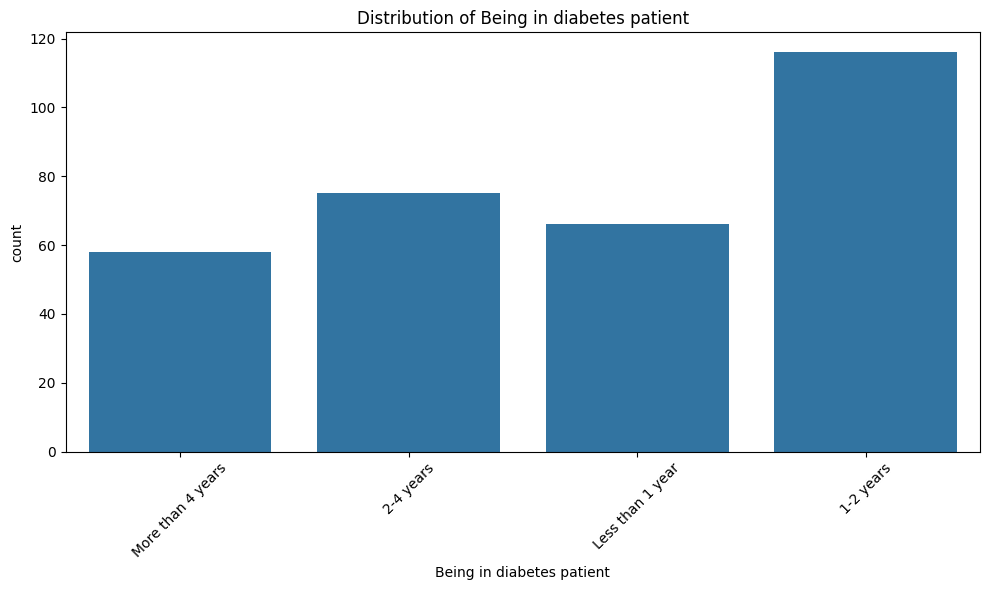

<Figure size 640x480 with 0 Axes>

In [18]:
# Distribution of target variable
plt.figure(figsize=(10, 6))
if df[target_variable].dtype == 'object':
    sns.countplot(x=target_variable, data=df)
else:
    sns.histplot(df[target_variable], kde=True)
plt.title(f'Distribution of {target_variable}')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
plt.savefig('/content/figures/target_distribution.png')


In [19]:
# Pairplot of numeric features with target variable
print("Generating pairplot (this may take a moment)...")
numeric_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()


Generating pairplot (this may take a moment)...


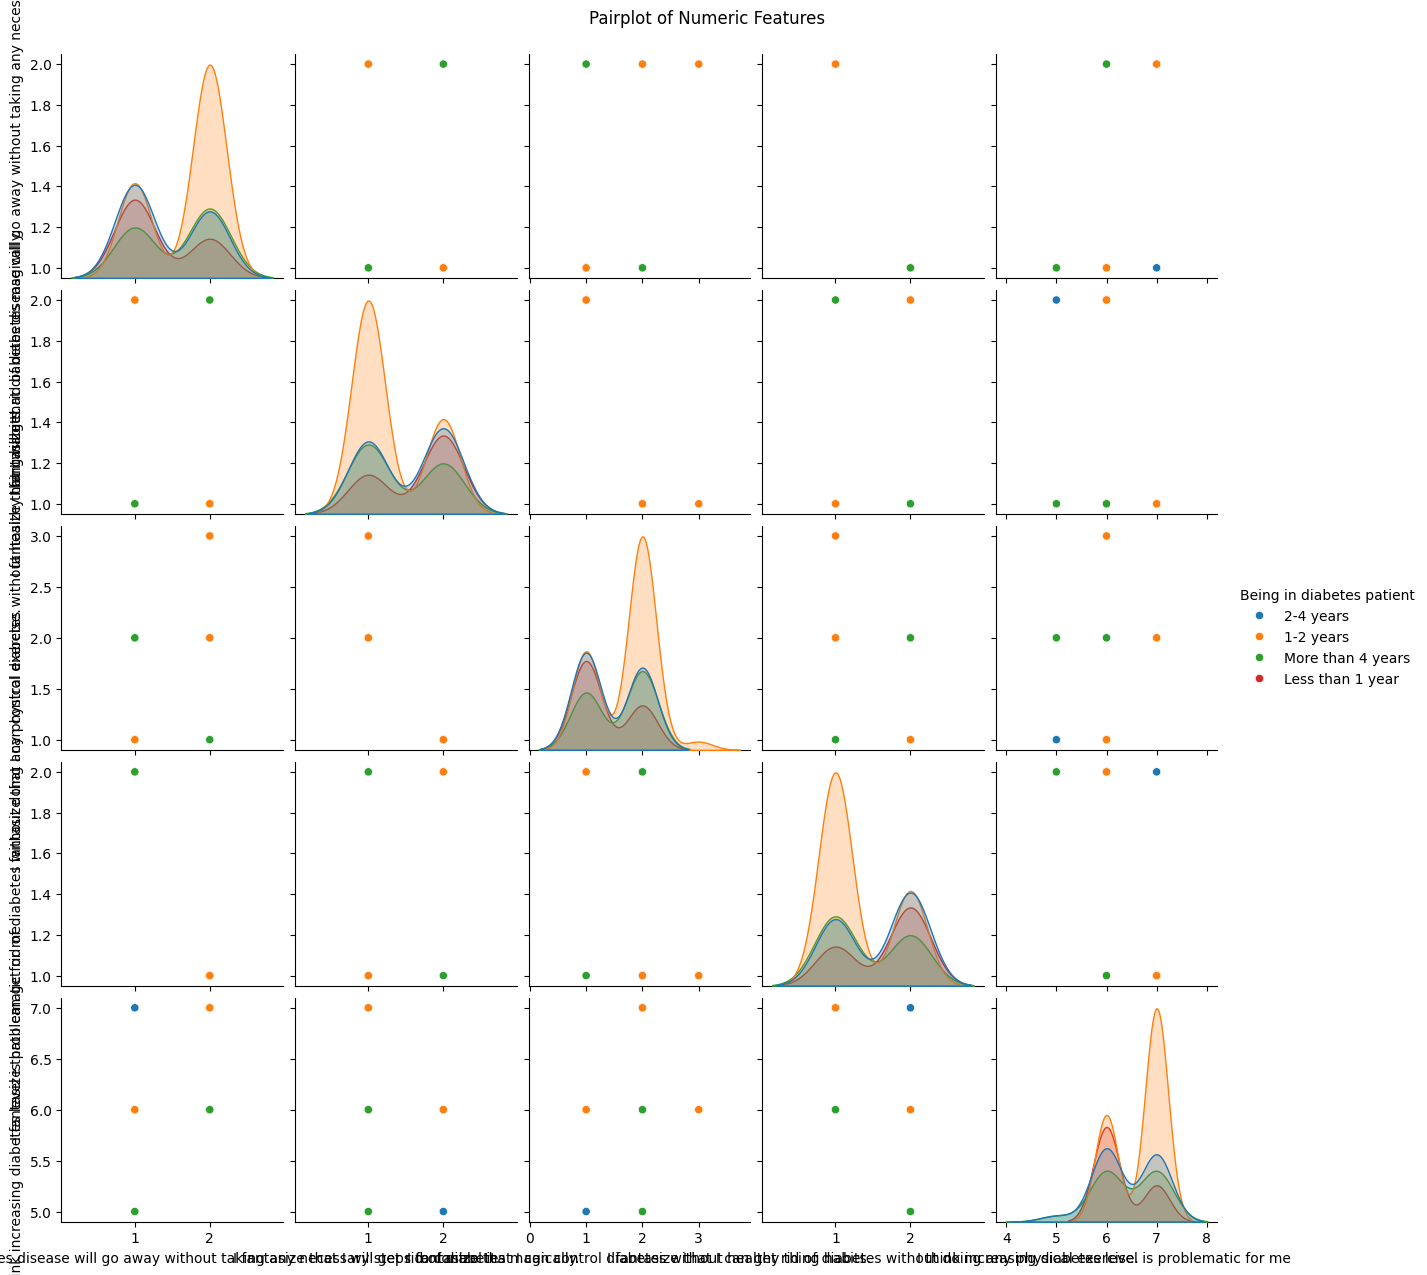

<Figure size 640x480 with 0 Axes>

In [20]:
# Limit to a few columns for visibility
if len(numeric_features) > 5:
    numeric_features = numeric_features[:5]

if target_variable in numeric_features:
    numeric_features.remove(target_variable)

sample_data = df.sample(min(100, len(df)))  # Sample to speed up plotting if needed
sns.pairplot(sample_data[numeric_features + [target_variable]], hue=target_variable if len(df[target_variable].unique()) < 10 else None)
plt.suptitle('Pairplot of Numeric Features', y=1.02)
plt.show()
plt.savefig('/content/figures/pairplot.png')


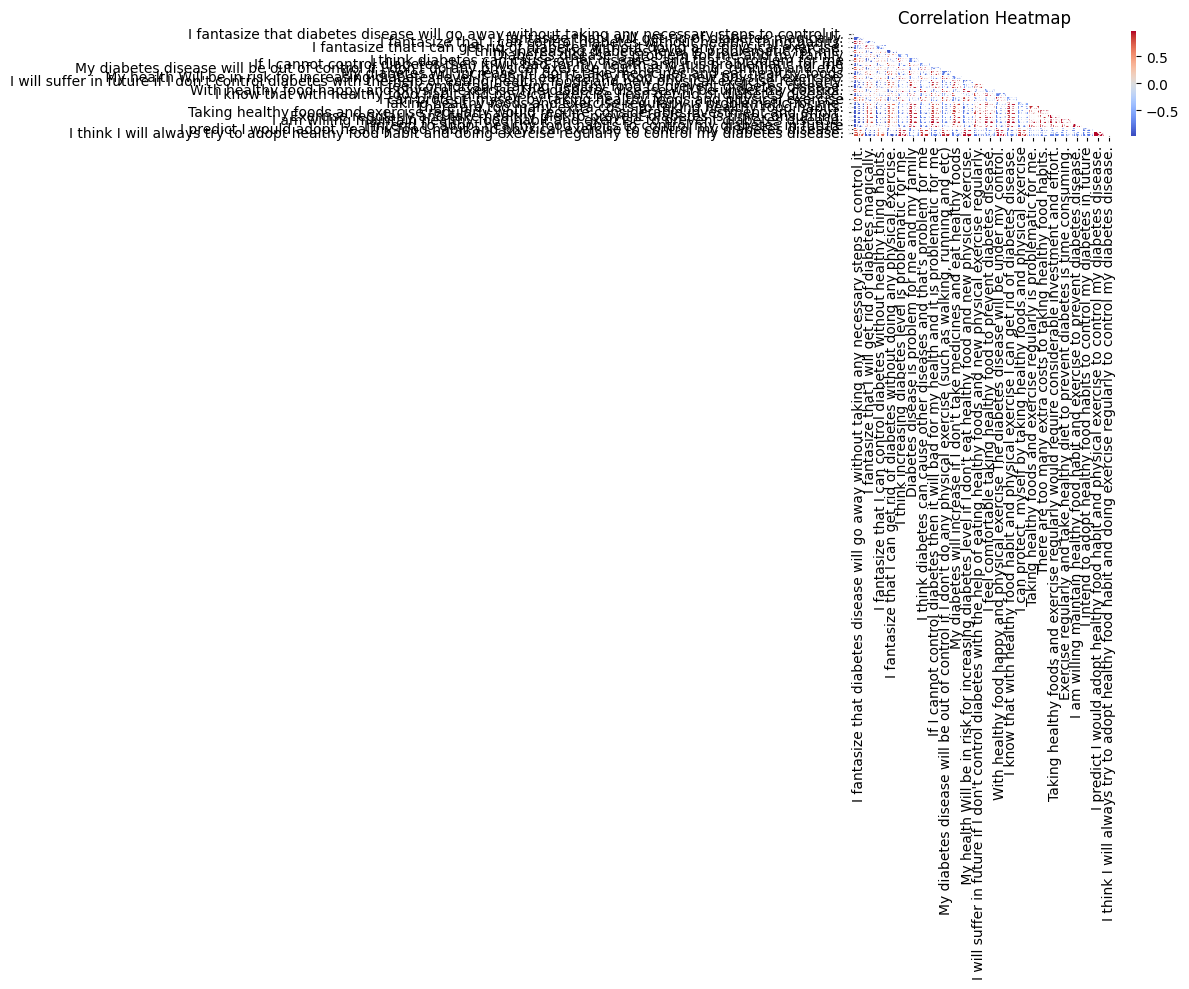

<Figure size 640x480 with 0 Axes>

In [21]:
# Correlation heatmap
plt.figure(figsize=(12, 10))
correlation_matrix = df.select_dtypes(include=['int64', 'float64']).corr()
mask = np.triu(correlation_matrix)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, mask=mask)
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()
plt.savefig('/content/figures/correlation_heatmap.png')


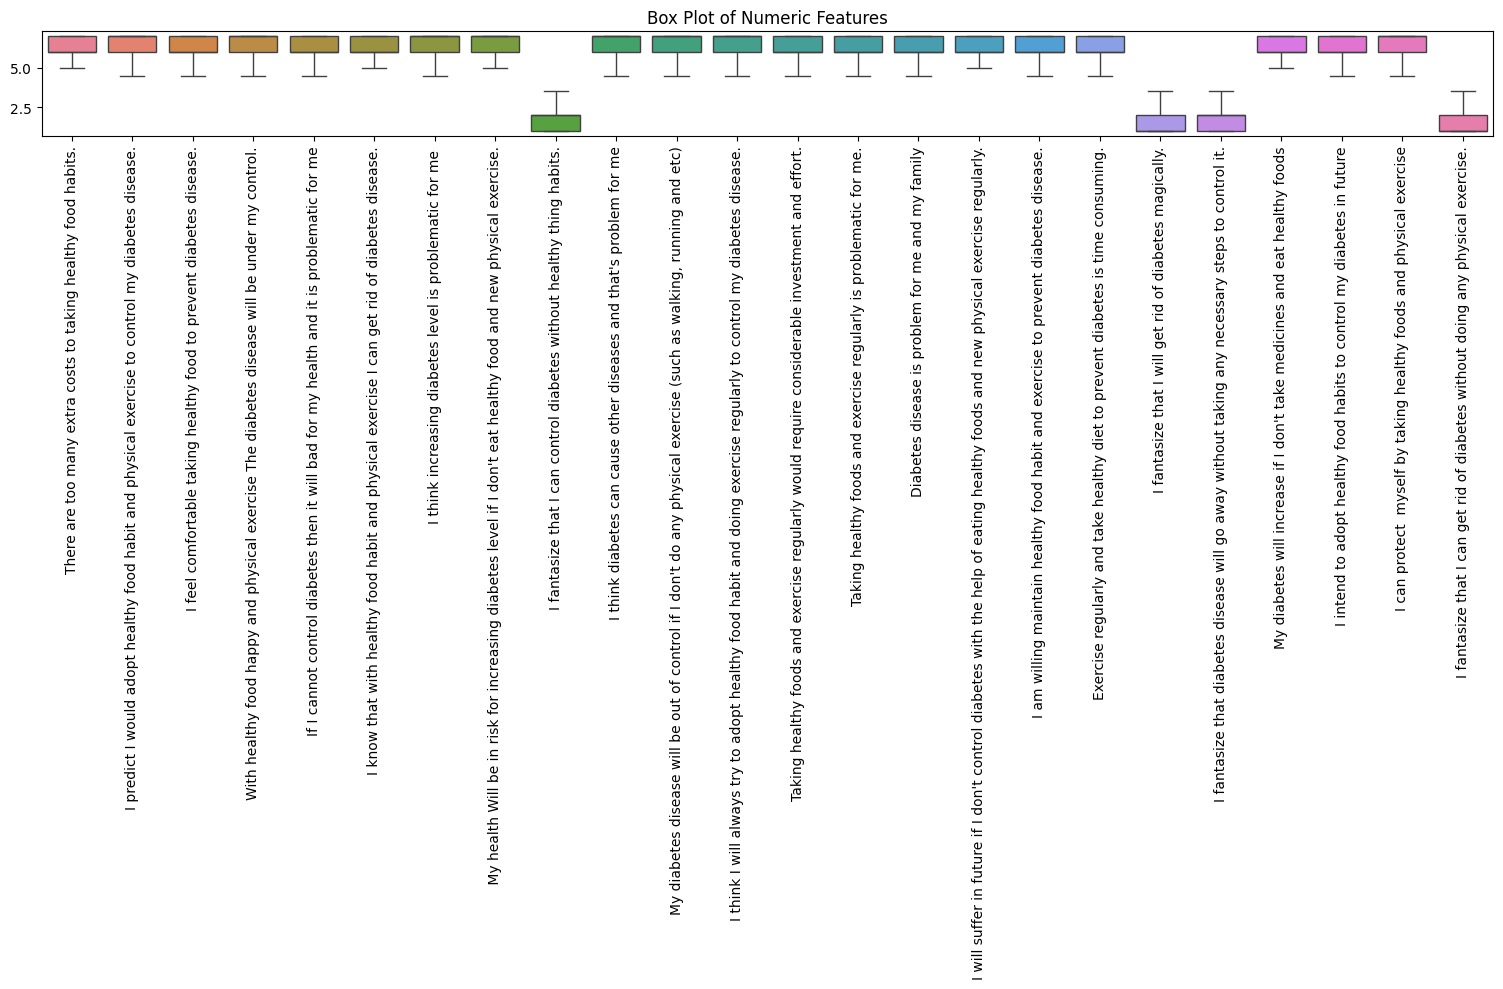

<Figure size 640x480 with 0 Axes>

In [22]:
# Box plots for numeric features to visualize distributions and outliers
plt.figure(figsize=(15, 10))
df_numeric = df.select_dtypes(include=['int64', 'float64'])
df_numeric_sample = df_numeric.sample(min(100, len(df_numeric.columns)), axis=1) if df_numeric.shape[1] > 10 else df_numeric
sns.boxplot(data=df_numeric_sample)
plt.title('Box Plot of Numeric Features')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()
plt.savefig('/content/figures/boxplot_numeric.png')


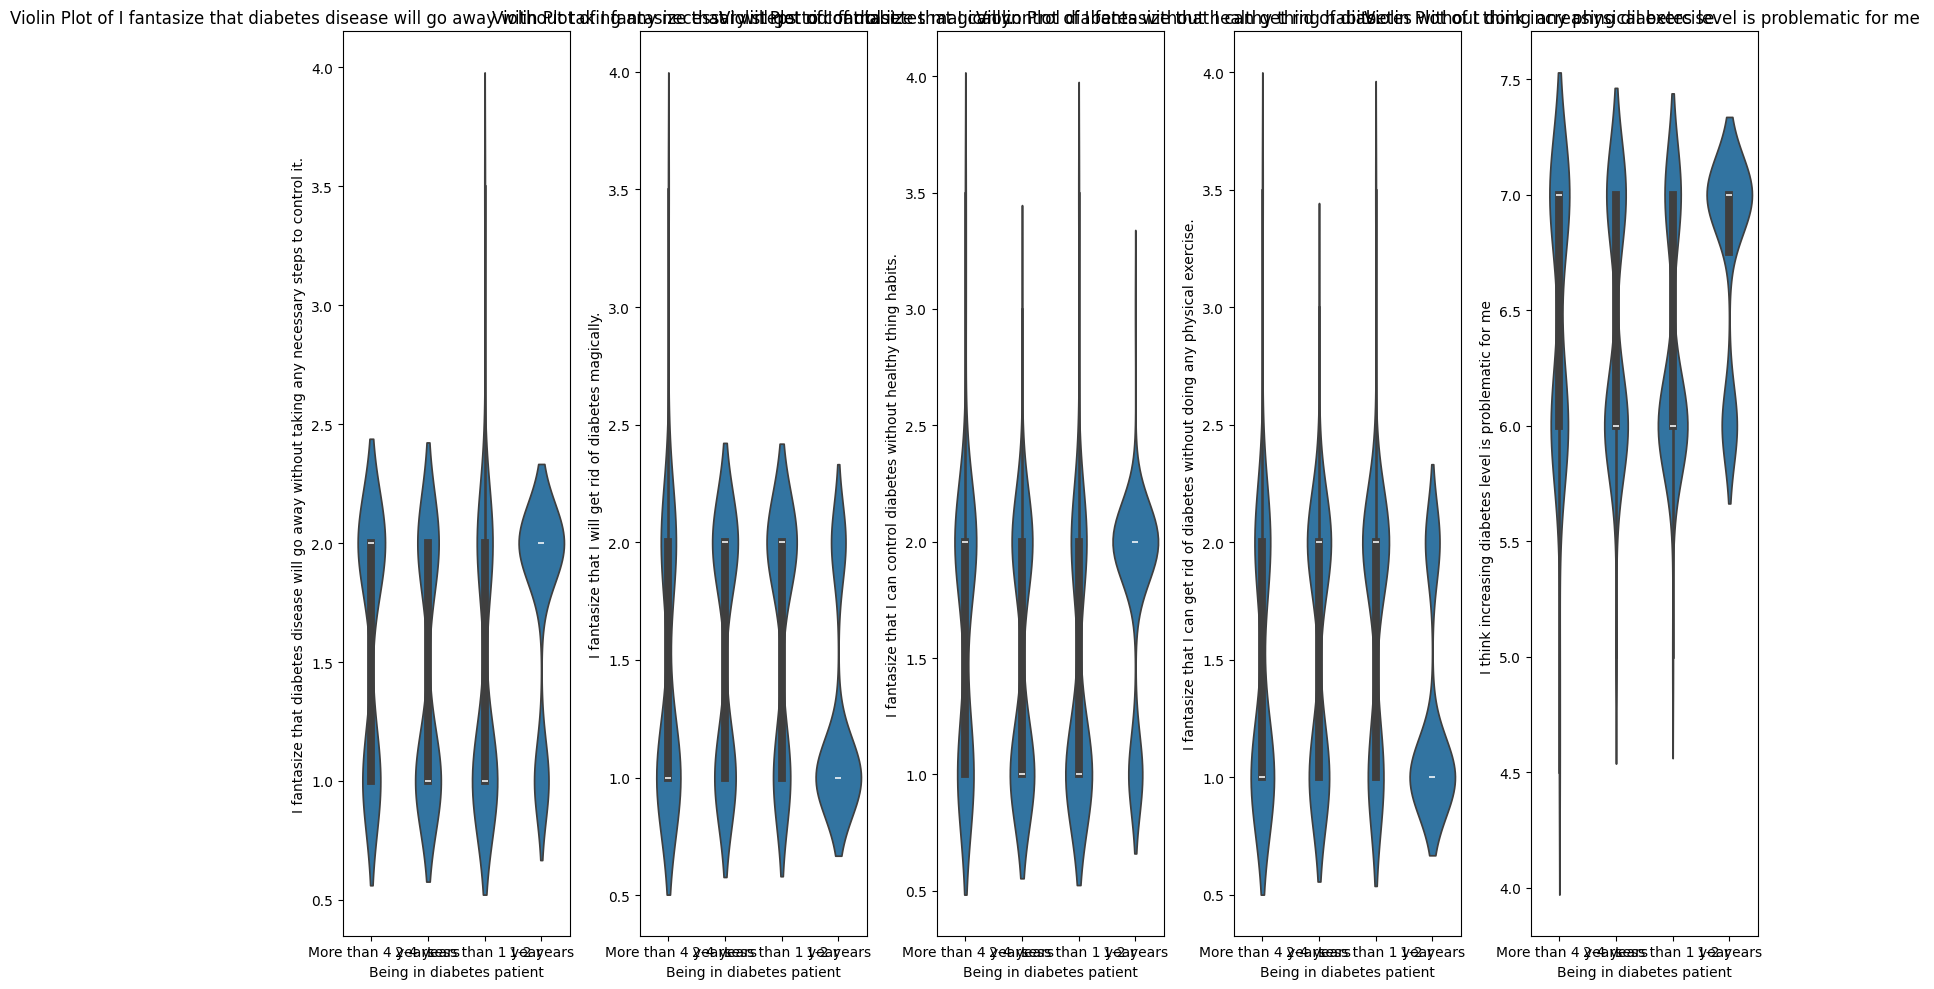

<Figure size 640x480 with 0 Axes>

In [23]:
# Violin plots for distribution and probability density
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_features[:min(5, len(numeric_features))]):
    plt.subplot(1, min(5, len(numeric_features)), i+1)
    sns.violinplot(y=df[col], x=df[target_variable] if len(df[target_variable].unique()) < 10 else None)
    plt.title(f'Violin Plot of {col}')
    plt.tight_layout()
plt.show()
plt.savefig('/content/figures/violin_plots.png')


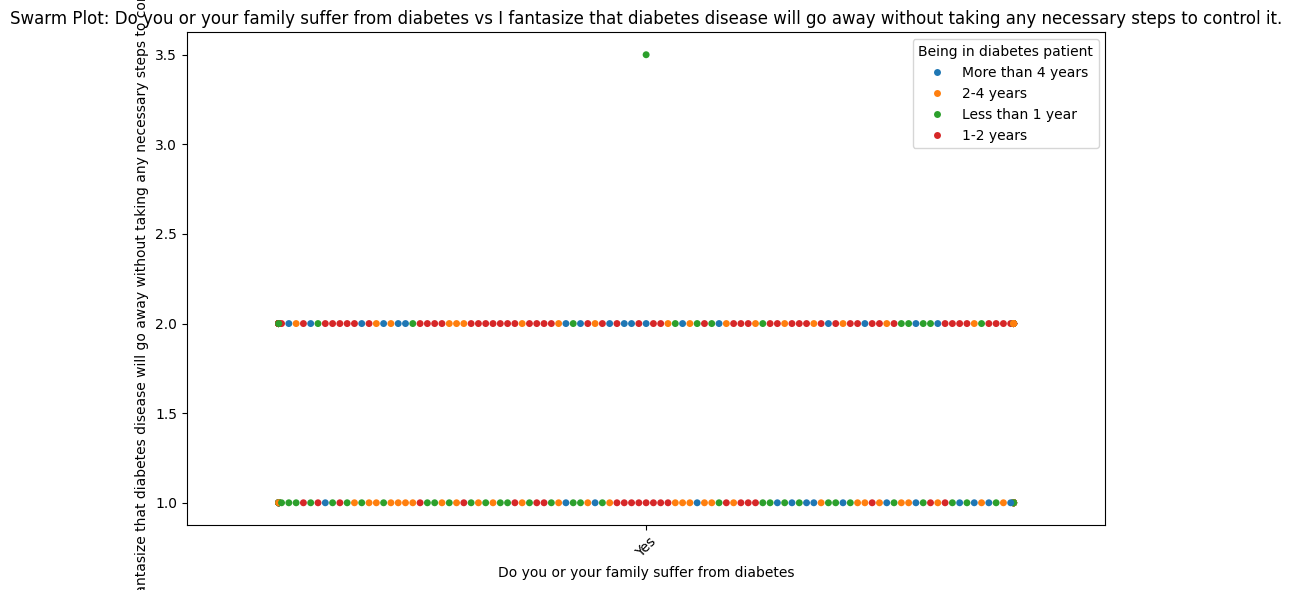

<Figure size 640x480 with 0 Axes>

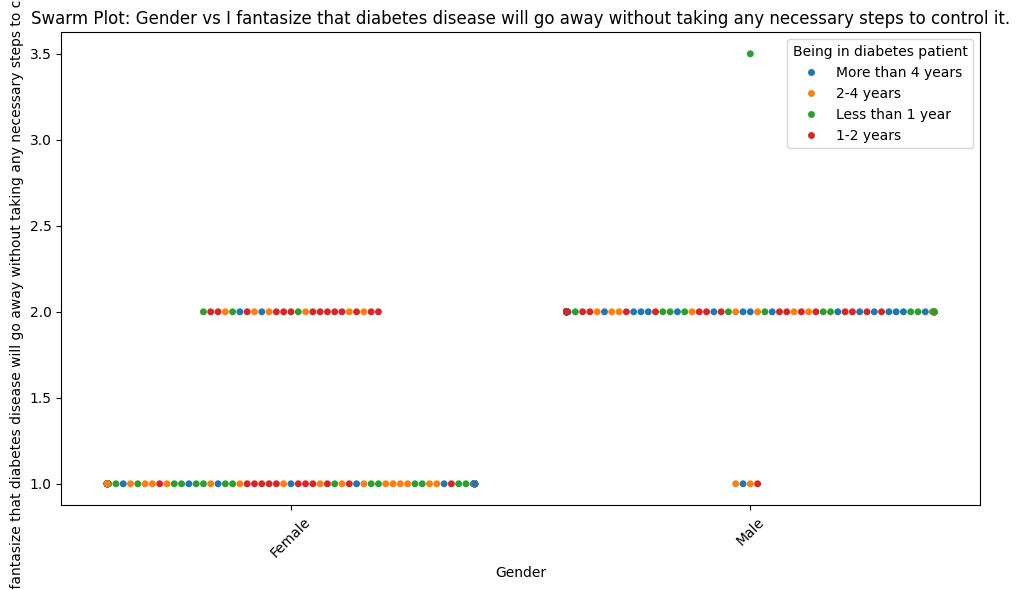

<Figure size 640x480 with 0 Axes>

In [24]:
# Swarm plots for categorical distributions
if len(categorical_cols) > 0:
    for col in categorical_cols[:min(3, len(categorical_cols))]:
        if df[col].nunique() < 10:  # Only create swarm plots for categorical columns with few categories
            plt.figure(figsize=(10, 6))
            sns.swarmplot(x=col, y=numeric_features[0], data=df, hue=target_variable if len(df[target_variable].unique()) < 10 else None)
            plt.title(f'Swarm Plot: {col} vs {numeric_features[0]}')
            plt.xticks(rotation=45)
            plt.tight_layout()
            plt.show()
            plt.savefig(f'/content/figures/swarmplot_{col}.png')



<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

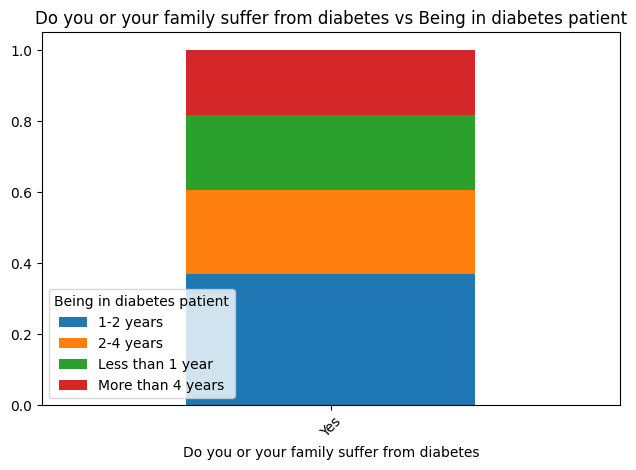

<Figure size 640x480 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

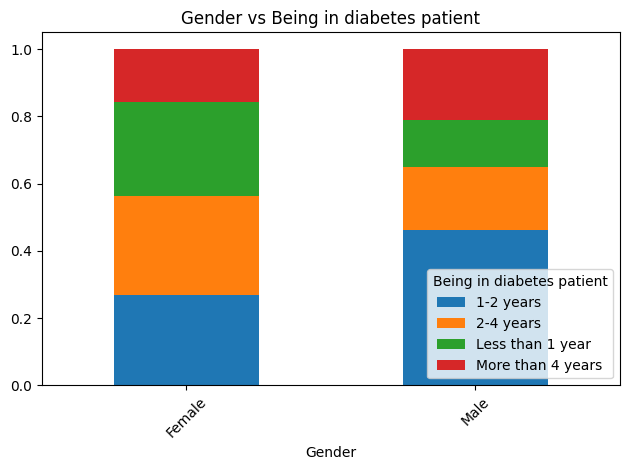

<Figure size 640x480 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

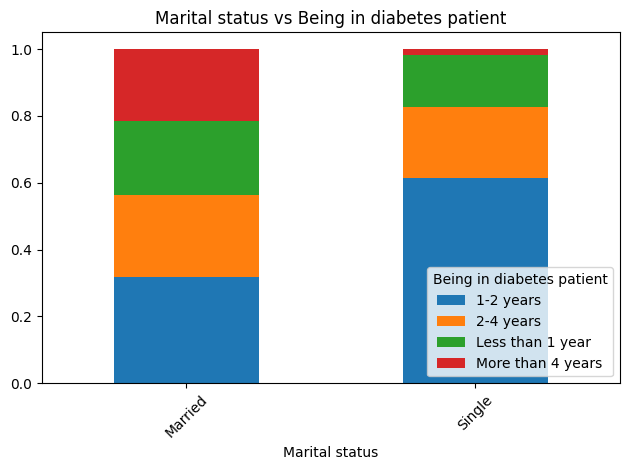

<Figure size 640x480 with 0 Axes>

In [25]:
# Categorical feature analysis
if len(categorical_cols) > 0:
    for col in categorical_cols[:min(5, len(categorical_cols))]:
        plt.figure(figsize=(10, 6))

        # Check if the categorical feature has less than 10 unique values
        if df[col].nunique() < 10:
            if df[target_variable].dtype == 'object' and df[target_variable].nunique() < 10:
                # Stacked barplot for categorical features vs target
                pd.crosstab(df[col], df[target_variable], normalize='index').plot(kind='bar', stacked=True)
                plt.title(f'{col} vs {target_variable}')
            else:
                # Regular count plot
                sns.countplot(x=col, data=df)
                plt.title(f'Distribution of {col}')

            plt.xticks(rotation=45)
            plt.tight_layout()
            plt.show()
            plt.savefig(f'/content/figures/categorical_{col}.png')


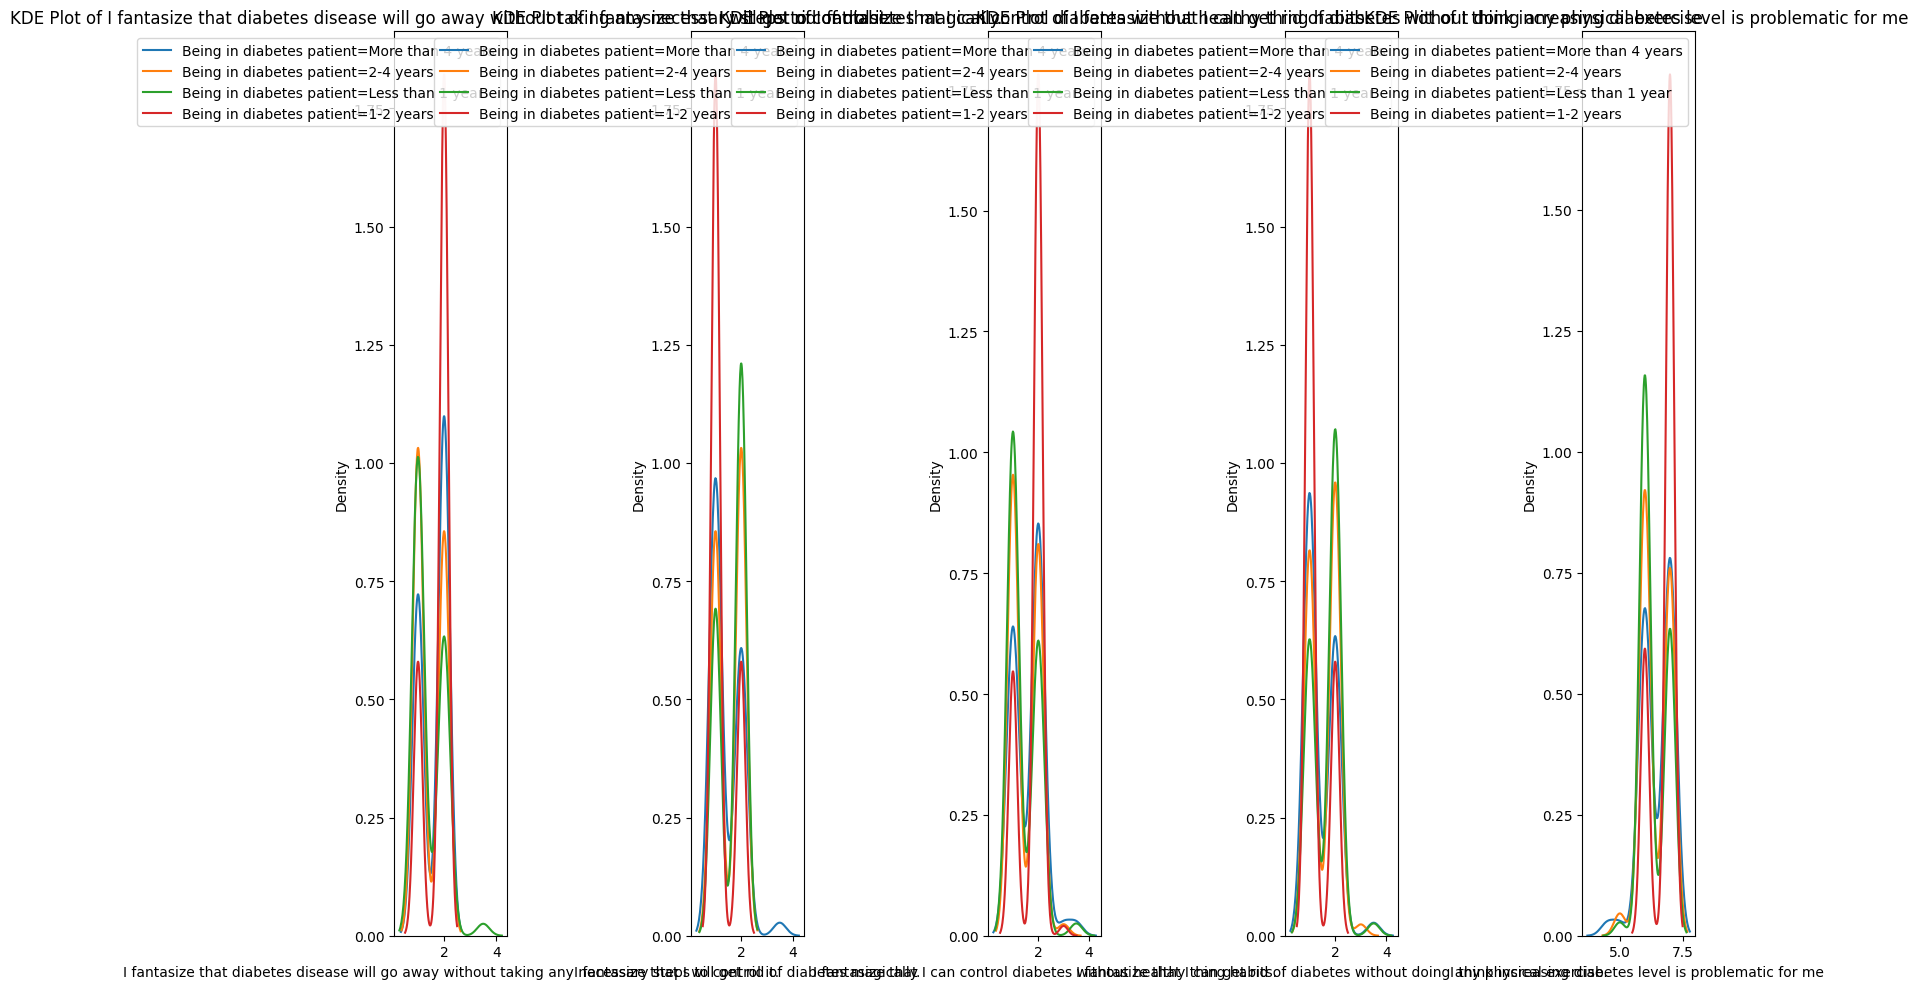

<Figure size 640x480 with 0 Axes>

In [26]:
# KDE Plots for numeric features
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_features[:min(5, len(numeric_features))]):
    plt.subplot(1, min(5, len(numeric_features)), i+1)
    for val in df[target_variable].unique():
        subset = df[df[target_variable] == val]
        sns.kdeplot(subset[col], label=f'{target_variable}={val}')
    plt.title(f'KDE Plot of {col}')
    plt.legend()
plt.tight_layout()
plt.show()
plt.savefig('/content/figures/kde_plots.png')


# 3️⃣ Feature Engineering & Encoding

In [27]:
logger.info("Step 3: Feature Engineering and Encoding")

In [28]:
# Save the original column names and their types for later interpretation
original_columns = df.columns.tolist()
column_types = {col: str(df[col].dtype) for col in original_columns}

In [29]:
# Encoding Categorical Variables
if len(categorical_cols) > 0:
    print("\n--- Encoding Categorical Variables ---")

    # Label Encoding
    label_encoders = {}
    for col in categorical_cols:
        if df[col].nunique() <= 30:  # Only encode if not too many unique values
            le = LabelEncoder()
            df[col] = le.fit_transform(df[col])
            label_encoders[col] = le
            print(f"Label encoded {col}: {list(le.classes_)}")
        else:
            # For high cardinality features, we might want to drop or use other techniques
            print(f"Skipping encoding for {col} due to high cardinality ({df[col].nunique()} values)")



--- Encoding Categorical Variables ---
Skipping encoding for Your Name due to high cardinality (310 values)
Label encoded Do you or your family suffer from diabetes: ['Yes']
Label encoded Gender: ['Female', 'Male']
Label encoded Age: ['15-20 years', '21-25 years', '26-30 years', '31-35 years', '36-40 years', '41-45 years', '46-50 years', '51-55 years', '56-60 years', '61-65 years', 'Above 65-years']
Label encoded Marital status: ['Married', 'Single']
Label encoded Academic qualification: ['Diploma or equivalent', 'HSC or equivalent', 'Honors or equivalent', 'Masters or equivalent', 'No recognized academic degree', 'Others', 'PhD or equivalent', 'Post Doctorate or equivalent', 'SSC or equivalent']
Label encoded Profession: ['Business', 'Don’t work', 'Freelancing', 'Others', 'Private sector', 'Public sector', 'Student']
Label encoded Being in diabetes patient: ['1-2 years', '2-4 years', 'Less than 1 year', 'More than 4 years']
Label encoded Exercise par day: ['10 to 20 minutes', '20-40 

In [30]:
# Feature Scaling
print("\n--- Feature Scaling ---")
# Identify columns to scale (numeric columns except the target if it's binary)
cols_to_scale = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
if target_variable in cols_to_scale and df[target_variable].nunique() <= 2:
    cols_to_scale.remove(target_variable)

scaler = StandardScaler()
df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])
print(f"Applied StandardScaler to {len(cols_to_scale)} numeric features")
logger.info(f"Features scaled using StandardScaler")


--- Feature Scaling ---
Applied StandardScaler to 32 numeric features


# 4️⃣ Feature Selection & Dimensionality Reduction (if needed)

In [31]:
if len(cols_to_scale) > 15:  # If we have many features, consider PCA
    print("\n--- Dimensionality Reduction with PCA ---")


--- Dimensionality Reduction with PCA ---


In [32]:
    # Apply PCA
    pca = PCA(n_components=0.95)  # Retain 95% of variance
    pca_result = pca.fit_transform(df[cols_to_scale])

In [33]:
    # Create new dataframe with PCA features
    pca_df = pd.DataFrame(
        data=pca_result,
        columns=[f'PC{i+1}' for i in range(pca_result.shape[1])]
    )


In [34]:
    # Add target variable
    pca_df[target_variable] = df[target_variable].values

    print(f"Reduced dimensions from {len(cols_to_scale)} to {pca_result.shape[1]} features")
    print(f"Explained variance ratio: {pca.explained_variance_ratio_}")


Reduced dimensions from 32 to 10 features
Explained variance ratio: [0.67271309 0.07367208 0.06121544 0.03664399 0.02927775 0.02293541
 0.02042073 0.01652762 0.01303888 0.01035807]


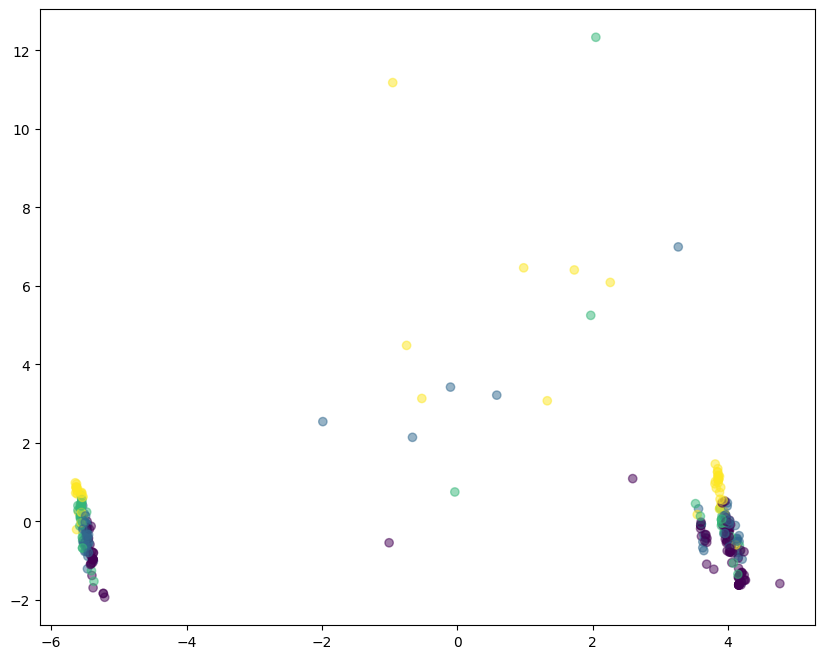

In [35]:
    # Visualize first two principal components
    plt.figure(figsize=(10, 8))
    scatter = plt.scatter(pca_df['PC1'], pca_df['PC2'], c=pca_df[target_variable] if df[target_variable].nunique() <= 10 else None, cmap='viridis', alpha=0.5)


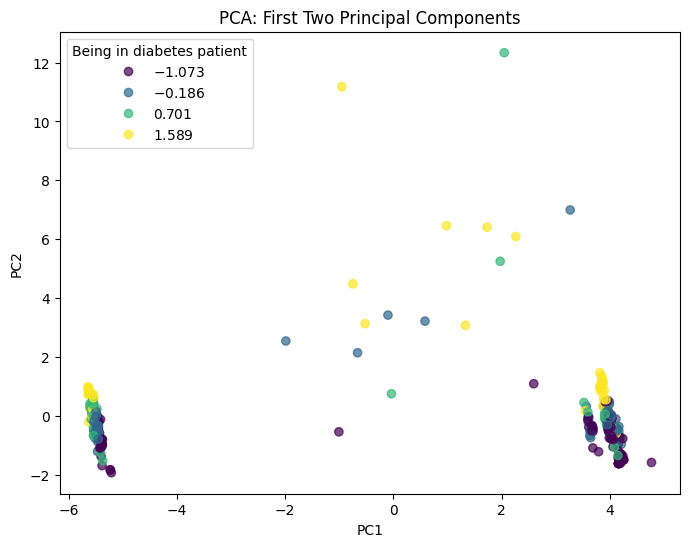

In [36]:
import matplotlib.pyplot as plt

# Assuming PCA DataFrame is available
plt.figure(figsize=(8,6))

# Scatter plot with color based on target variable
scatter = plt.scatter(pca_df.iloc[:, 0], pca_df.iloc[:, 1],
                      c=df[target_variable], cmap='viridis', alpha=0.7)

# If the target variable has few categories, add a legend
if df[target_variable].nunique() <= 10:
    plt.legend(*scatter.legend_elements(), title=target_variable)
else:
    plt.colorbar(scatter, label=target_variable)  # Use colorbar if continuous

plt.title('PCA: First Two Principal Components')
plt.xlabel('PC1')
plt.ylabel('PC2')

# Save before showing
plt.savefig('/content/figures/pca_visualization.png', dpi=300)
plt.show()

# Store PCA results if needed later
df_pca = pca_df

# 5️⃣ Data Splitting & Cross-Validation Strategy

In [37]:
logger.info("Step 5: Data Splitting and Cross-Validation Setup")

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

In [39]:
# Encode the target variable
df[target_variable] = label_encoder.fit_transform(df[target_variable])

# Define target and features
y = df[target_variable]
X = df.drop(columns=[target_variable])
X = df.drop(columns=['Timestamp', 'Your Name'])

# Check if target is categorical or continuous
is_classification = y.dtype == 'object' or y.nunique() <= 10
problem_type = "Classification" if is_classification else "Regression"
print(f"\nProblem type detected: {problem_type}")

# Split the data into training and testing sets
if is_classification:
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, stratify=y if len(y.unique()) > 1 else None, random_state=42
    )
else:
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

print(f"Training set: {X_train.shape[0]} samples")
print(f"Testing set: {X_test.shape[0]} samples")

# Define cross-validation strategy
if is_classification:
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    logger.info("Using StratifiedKFold CV for classification")
else:
    cv = KFold(n_splits=5, shuffle=True, random_state=42)
    logger.info("Using KFold CV for regression")



Problem type detected: Classification
Training set: 252 samples
Testing set: 63 samples


# 7️⃣ ML Model Training with Default Parameters

In [40]:
logger.info("Step 7: ML Model Training with Default Parameters")

In [41]:
print("\n--- Training ML Models (Default Parameters) ---")


--- Training ML Models (Default Parameters) ---


In [42]:
# Define models based on problem type
if is_classification:
    models = {
        'Decision Tree': DecisionTreeClassifier(random_state=42),
        'Random Forest': RandomForestClassifier(random_state=42, n_jobs=-1),
        'KNN': KNeighborsClassifier(n_jobs=-1),
        'SVM': SVC(probability=True, random_state=42),
        'AdaBoost': AdaBoostClassifier(random_state=42),
        'XGBoost': XGBClassifier(random_state=42, n_jobs=-1),
        'Neural Network': MLPClassifier(random_state=42, max_iter=1000)
    }
else:
    models = {
        'Decision Tree': DecisionTreeRegressor(random_state=42),
        'Random Forest': RandomForestRegressor(random_state=42, n_jobs=-1),
        'KNN': KNeighborsRegressor(n_jobs=-1),
        'SVR': SVR(),
        'AdaBoost': AdaBoostRegressor(random_state=42),
        'XGBoost': XGBRegressor(random_state=42, n_jobs=-1)
    }



Training Decision Tree...
Decision Tree Results:
  Training Accuracy: 1.0000
  Testing Accuracy: 1.0000

Classification Report (Test Set):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        15
           2       1.00      1.00      1.00        13
           3       1.00      1.00      1.00        12

    accuracy                           1.00        63
   macro avg       1.00      1.00      1.00        63
weighted avg       1.00      1.00      1.00        63



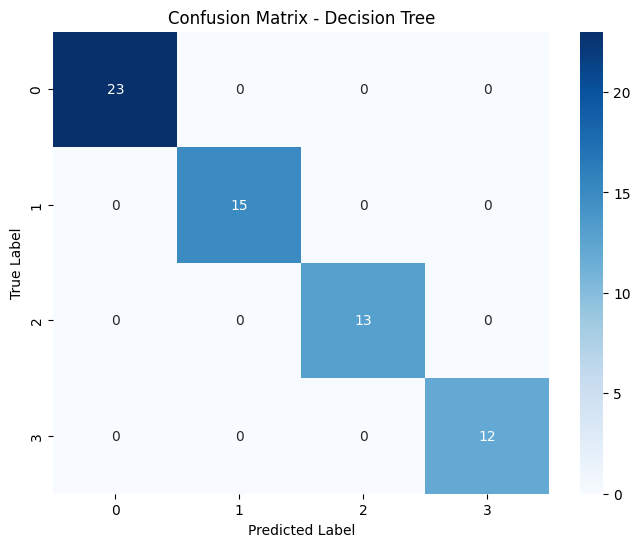


Training Random Forest...
Random Forest Results:
  Training Accuracy: 1.0000
  Testing Accuracy: 0.9683

Classification Report (Test Set):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      0.93      0.97        15
           2       0.87      1.00      0.93        13
           3       1.00      0.92      0.96        12

    accuracy                           0.97        63
   macro avg       0.97      0.96      0.96        63
weighted avg       0.97      0.97      0.97        63



<Figure size 640x480 with 0 Axes>

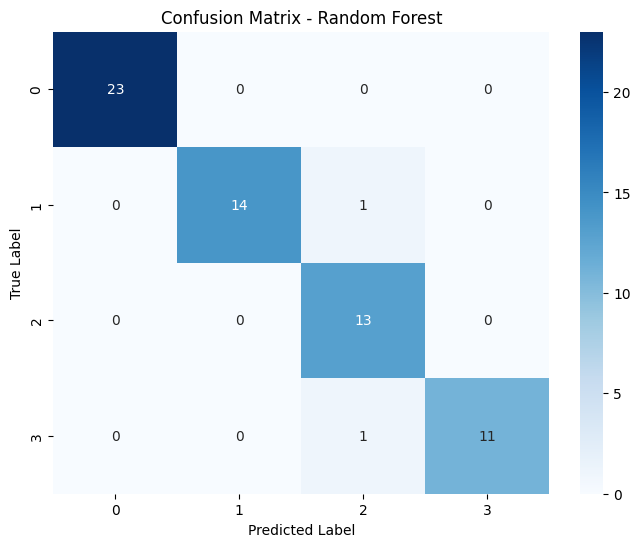


Training KNN...
KNN Results:
  Training Accuracy: 0.8452
  Testing Accuracy: 0.8889

Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.88      0.96      0.92        23
           1       0.86      0.80      0.83        15
           2       0.85      0.85      0.85        13
           3       1.00      0.92      0.96        12

    accuracy                           0.89        63
   macro avg       0.90      0.88      0.89        63
weighted avg       0.89      0.89      0.89        63



<Figure size 640x480 with 0 Axes>

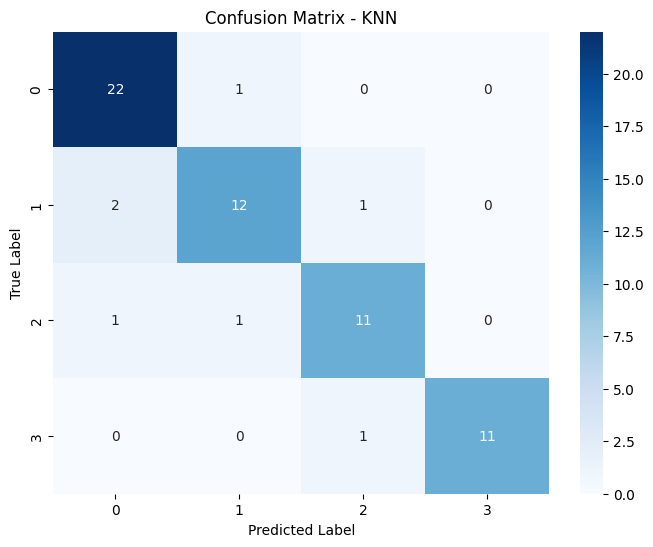


Training SVM...
SVM Results:
  Training Accuracy: 0.9484
  Testing Accuracy: 0.9524

Classification Report (Test Set):
              precision    recall  f1-score   support

           0       1.00      0.91      0.95        23
           1       0.83      1.00      0.91        15
           2       1.00      0.92      0.96        13
           3       1.00      1.00      1.00        12

    accuracy                           0.95        63
   macro avg       0.96      0.96      0.96        63
weighted avg       0.96      0.95      0.95        63



<Figure size 640x480 with 0 Axes>

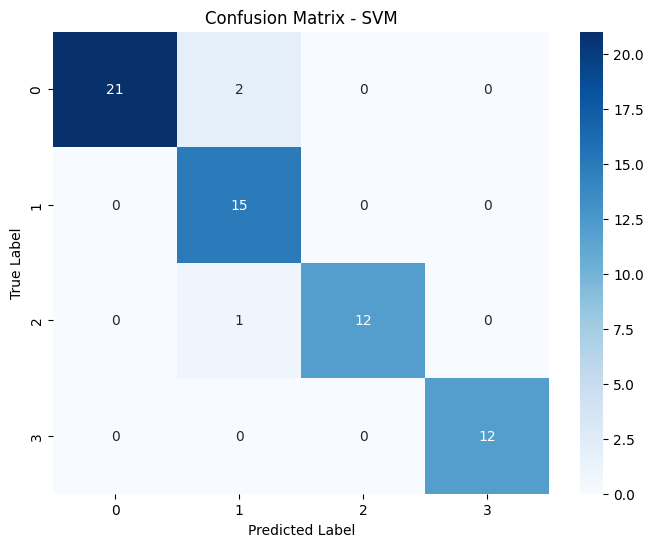


Training AdaBoost...
AdaBoost Results:
  Training Accuracy: 0.3929
  Testing Accuracy: 0.3968

Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        23
           1       0.00      0.00      0.00        15
           2       0.25      1.00      0.41        13
           3       1.00      1.00      1.00        12

    accuracy                           0.40        63
   macro avg       0.31      0.50      0.35        63
weighted avg       0.24      0.40      0.27        63



<Figure size 640x480 with 0 Axes>

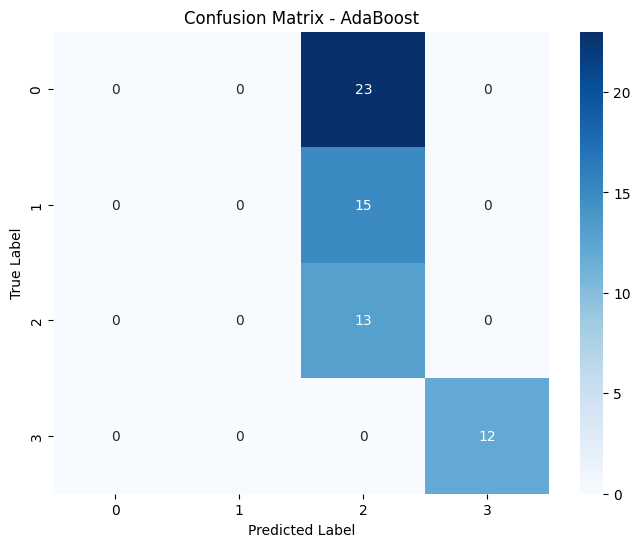


Training XGBoost...
XGBoost Results:
  Training Accuracy: 1.0000
  Testing Accuracy: 1.0000

Classification Report (Test Set):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        15
           2       1.00      1.00      1.00        13
           3       1.00      1.00      1.00        12

    accuracy                           1.00        63
   macro avg       1.00      1.00      1.00        63
weighted avg       1.00      1.00      1.00        63



<Figure size 640x480 with 0 Axes>

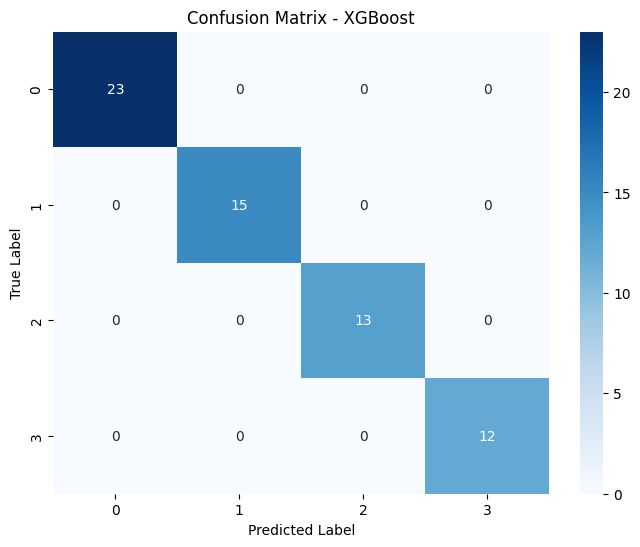


Training Neural Network...
Neural Network Results:
  Training Accuracy: 1.0000
  Testing Accuracy: 1.0000

Classification Report (Test Set):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        15
           2       1.00      1.00      1.00        13
           3       1.00      1.00      1.00        12

    accuracy                           1.00        63
   macro avg       1.00      1.00      1.00        63
weighted avg       1.00      1.00      1.00        63



<Figure size 640x480 with 0 Axes>

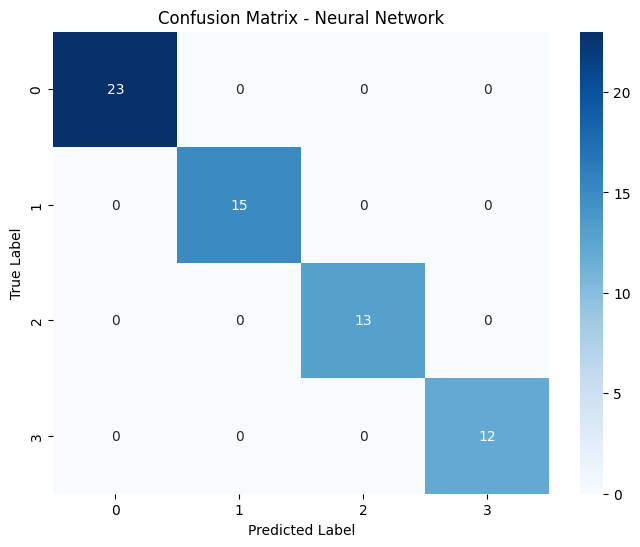

<Figure size 640x480 with 0 Axes>

In [43]:
# Ensure 'is_classification' is defined, else set it explicitly or check if it's set elsewhere.
# For example:
# is_classification = True  # Set based on your problem type

# Train and evaluate base models
model_results = {}
for name, model in models.items():
    print(f"\nTraining {name}...")
    model.fit(X_train, y_train)

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Evaluate model
    if is_classification:
        # Classification metrics
        train_accuracy = accuracy_score(y_train, y_train_pred)
        test_accuracy = accuracy_score(y_test, y_test_pred)

        print(f"{name} Results:")
        print(f"  Training Accuracy: {train_accuracy:.4f}")
        print(f"  Testing Accuracy: {test_accuracy:.4f}")

        # Generate classification report
        print("\nClassification Report (Test Set):")
        print(classification_report(y_test, y_test_pred))

        # Plot confusion matrix
        plt.figure(figsize=(8, 6))
        cm = confusion_matrix(y_test, y_test_pred)
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
        plt.title(f'Confusion Matrix - {name}')
        plt.xlabel('Predicted Label')
        plt.ylabel('True Label')
        plt.show()
        plt.savefig(f'/content/figures/confusion_matrix_{name}.png', bbox_inches='tight')

        # Store results
        model_results[name] = {
            'model': model,
            'train_accuracy': train_accuracy,
            'test_accuracy': test_accuracy
        }
    else:
        # For regression problems
        train_mse = mean_squared_error(y_train, y_train_pred)
        train_rmse = np.sqrt(train_mse)
        train_mae = mean_absolute_error(y_train, y_train_pred)
        train_r2 = r2_score(y_train, y_train_pred)

        test_mse = mean_squared_error(y_test, y_test_pred)
        test_rmse = np.sqrt(test_mse)
        test_mae = mean_absolute_error(y_test, y_test_pred)
        test_r2 = r2_score(y_test, y_test_pred)

        print(f"{name} Results:")
        print(f"  Training RMSE: {train_rmse:.4f}")
        print(f"  Testing RMSE: {test_rmse:.4f}")
        print(f"  Training MAE: {train_mae:.4f}")
        print(f"  Testing MAE: {test_mae:.4f}")
        print(f"  Training R²: {train_r2:.4f}")
        print(f"  Testing R²: {test_r2:.4f}")

        # Visualize Predicted vs Actual
        plt.figure(figsize=(10, 6))
        plt.scatter(y_test, y_test_pred, alpha=0.5)
        plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
        plt.xlabel('Actual')
        plt.ylabel('Predicted')
        plt.title(f'Actual vs Predicted - {name}')
        plt.show()
        plt.savefig(f'/content/figures/actual_vs_predicted_{name}.png', bbox_inches='tight')

        # Store results
        model_results[name] = {
            'model': model,
            'train_rmse': train_rmse,
            'test_rmse': test_rmse,
            'train_r2': train_r2,
            'test_r2': test_r2
        }

# 8️⃣ Hyperparameter Tuning

In [44]:
logger.info("Step 8: Hyperparameter Tuning")

print("\n--- Hyperparameter Tuning ---")


--- Hyperparameter Tuning ---


In [45]:
# Select top 3 models for hyperparameter tuning
if is_classification:
    top_models = sorted(model_results.items(), key=lambda x: x[1]['test_accuracy'], reverse=True)[:3]
else:
    top_models = sorted(model_results.items(), key=lambda x: x[1]['test_r2'], reverse=True)[:3]

print(f"Top models selected for hyperparameter tuning: {[model[0] for model in top_models]}")



Top models selected for hyperparameter tuning: ['Decision Tree', 'XGBoost', 'Neural Network']


In [46]:
# Define hyperparameter grids
param_grids = {
    'Decision Tree': {
        'criterion': ['gini', 'entropy'] if is_classification else ['squared_error', 'absolute_error'],
        'max_depth': [3, 5, 7, 10, None],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    'Random Forest': {
        'n_estimators': [50, 100, 200],
        'max_depth': [5, 10, 20, None],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    'KNN': {
        'n_neighbors': [3, 5, 7, 9, 11],
        'weights': ['uniform', 'distance'],
        'p': [1, 2]  # 1 for Manhattan, 2 for Euclidean
    },
    'SVM': {
        'C': [0.1, 1, 10, 100],
        'gamma': ['scale', 'auto', 0.1, 0.01],
        'kernel': ['rbf', 'linear', 'poly']
    },
    'SVR': {
        'C': [0.1, 1, 10, 100],
        'gamma': ['scale', 'auto', 0.1, 0.01],
        'kernel': ['rbf', 'linear', 'poly']
    },
    'AdaBoost': {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 1.0]
    },
    'XGBoost': {
        'n_estimators': [50, 100, 200],
        'max_depth': [3, 5, 7],
        'learning_rate': [0.01, 0.1, 0.3],
        'subsample': [0.8, 1.0],
        'colsample_bytree': [0.8, 1.0]
    },
    'Neural Network': {
        'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50)],
        'activation': ['relu', 'tanh'],
        'alpha': [0.0001, 0.001, 0.01],
        'learning_rate': ['constant', 'adaptive']
    }
}

best_tuned_models = {}



Tuning hyperparameters for Decision Tree...
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters: {'min_samples_split': 5, 'min_samples_leaf': 2, 'max_depth': None, 'criterion': 'gini'}
Best cross-validation score: 1.0000
Test accuracy with tuned model: 1.0000

Classification Report (Tuned Model):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        15
           2       1.00      1.00      1.00        13
           3       1.00      1.00      1.00        12

    accuracy                           1.00        63
   macro avg       1.00      1.00      1.00        63
weighted avg       1.00      1.00      1.00        63



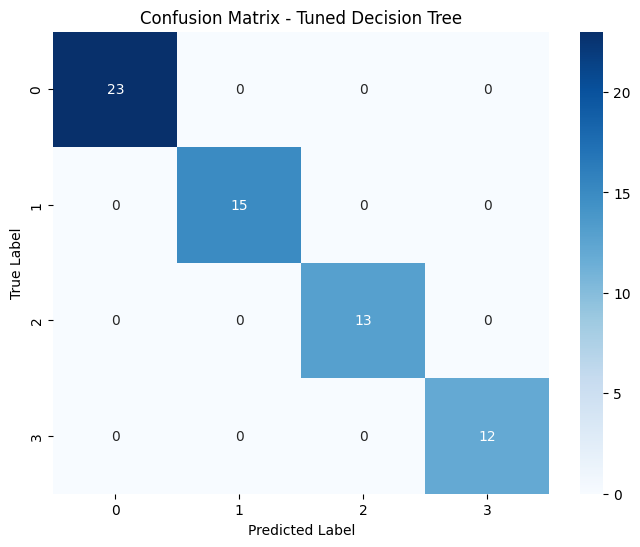


Tuning hyperparameters for XGBoost...
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters: {'subsample': 1.0, 'n_estimators': 200, 'max_depth': 3, 'learning_rate': 0.1, 'colsample_bytree': 1.0}
Best cross-validation score: 1.0000
Test accuracy with tuned model: 1.0000

Classification Report (Tuned Model):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        15
           2       1.00      1.00      1.00        13
           3       1.00      1.00      1.00        12

    accuracy                           1.00        63
   macro avg       1.00      1.00      1.00        63
weighted avg       1.00      1.00      1.00        63



<Figure size 640x480 with 0 Axes>

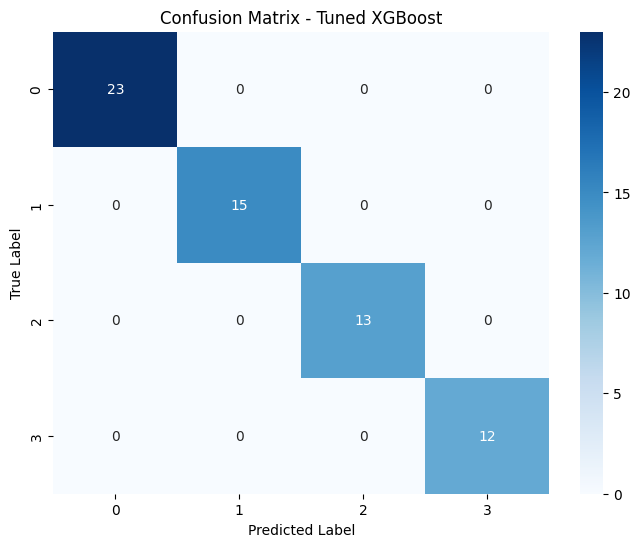


Tuning hyperparameters for Neural Network...
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters: {'learning_rate': 'adaptive', 'hidden_layer_sizes': (50, 50), 'alpha': 0.001, 'activation': 'tanh'}
Best cross-validation score: 0.8698
Test accuracy with tuned model: 0.9524

Classification Report (Tuned Model):
              precision    recall  f1-score   support

           0       1.00      0.96      0.98        23
           1       1.00      0.93      0.97        15
           2       0.81      1.00      0.90        13
           3       1.00      0.92      0.96        12

    accuracy                           0.95        63
   macro avg       0.95      0.95      0.95        63
weighted avg       0.96      0.95      0.95        63



<Figure size 640x480 with 0 Axes>

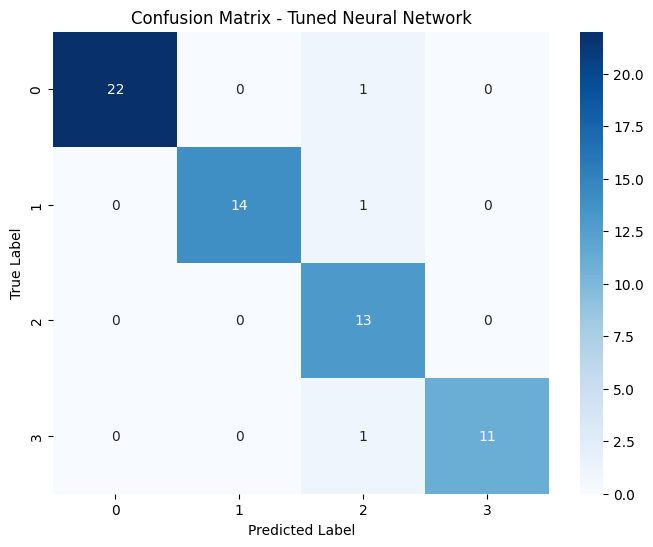

<Figure size 640x480 with 0 Axes>

In [47]:
# Perform hyperparameter tuning for top models
for model_name, model_info in top_models:
    print(f"\nTuning hyperparameters for {model_name}...")

    model = model_info['model']
    param_grid = param_grids.get(model_name, {})

    if param_grid:
        # Use RandomizedSearchCV for efficiency
        grid_search = RandomizedSearchCV(
            estimator=model,
            param_distributions=param_grid,
            n_iter=10,  # Try 10 combinations
            cv=cv,
            scoring='accuracy' if is_classification else 'neg_mean_squared_error',
            n_jobs=-1,
            random_state=42,
            verbose=1
        )

        grid_search.fit(X_train, y_train)

        print(f"Best parameters: {grid_search.best_params_}")
        print(f"Best cross-validation score: {grid_search.best_score_:.4f}")

        # Save the best model
        best_model = grid_search.best_estimator_
        best_tuned_models[model_name] = best_model

        # Evaluate the best model
        y_pred = best_model.predict(X_test)

        if is_classification:
            accuracy = accuracy_score(y_test, y_pred)
            print(f"Test accuracy with tuned model: {accuracy:.4f}")

            # Classification report
            print("\nClassification Report (Tuned Model):")
            print(classification_report(y_test, y_pred))

            # Confusion matrix
            plt.figure(figsize=(8, 6))
            cm = confusion_matrix(y_test, y_pred)
            sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
            plt.title(f'Confusion Matrix - Tuned {model_name}')
            plt.xlabel('Predicted Label')
            plt.ylabel('True Label')
            plt.show()
            plt.savefig(f'/content/figures/tuned_confusion_matrix_{model_name}.png')
        else:
            mse = mean_squared_error(y_test, y_pred)
            rmse = np.sqrt(mse)
            mae = mean_absolute_error(y_test, y_pred)
            r2 = r2_score(y_test, y_pred)

            print(f"Test RMSE with tuned model: {rmse:.4f}")
            print(f"Test MAE with tuned model: {mae:.4f}")
            print(f"Test R² with tuned model: {r2:.4f}")
    else:
        print(f"No parameter grid defined for {model_name}. Skipping tuning.")



# 9️⃣ Explainability & Feature Importance

In [48]:
logger.info("Step 9: Explainability and Feature Importance Analysis")

print("\n--- Explainability & Feature Importance Analysis ---")


--- Explainability & Feature Importance Analysis ---


In [49]:
# Select the best model for explainability
if is_classification:
    best_model_name = max(best_tuned_models.items(), key=lambda x: accuracy_score(y_test, x[1].predict(X_test)))[0] if best_tuned_models else max(model_results.items(), key=lambda x: x[1]['test_accuracy'])[0]
else:
    best_model_name = max(best_tuned_models.items(), key=lambda x: r2_score(y_test, x[1].predict(X_test)))[0] if best_tuned_models else max(model_results.items(), key=lambda x: x[1]['test_r2'])[0]

best_model = best_tuned_models.get(best_model_name, model_results[best_model_name]['model'])
print(f"Selected {best_model_name} for explainability analysis")



Selected Decision Tree for explainability analysis



1. Feature Importance Analysis


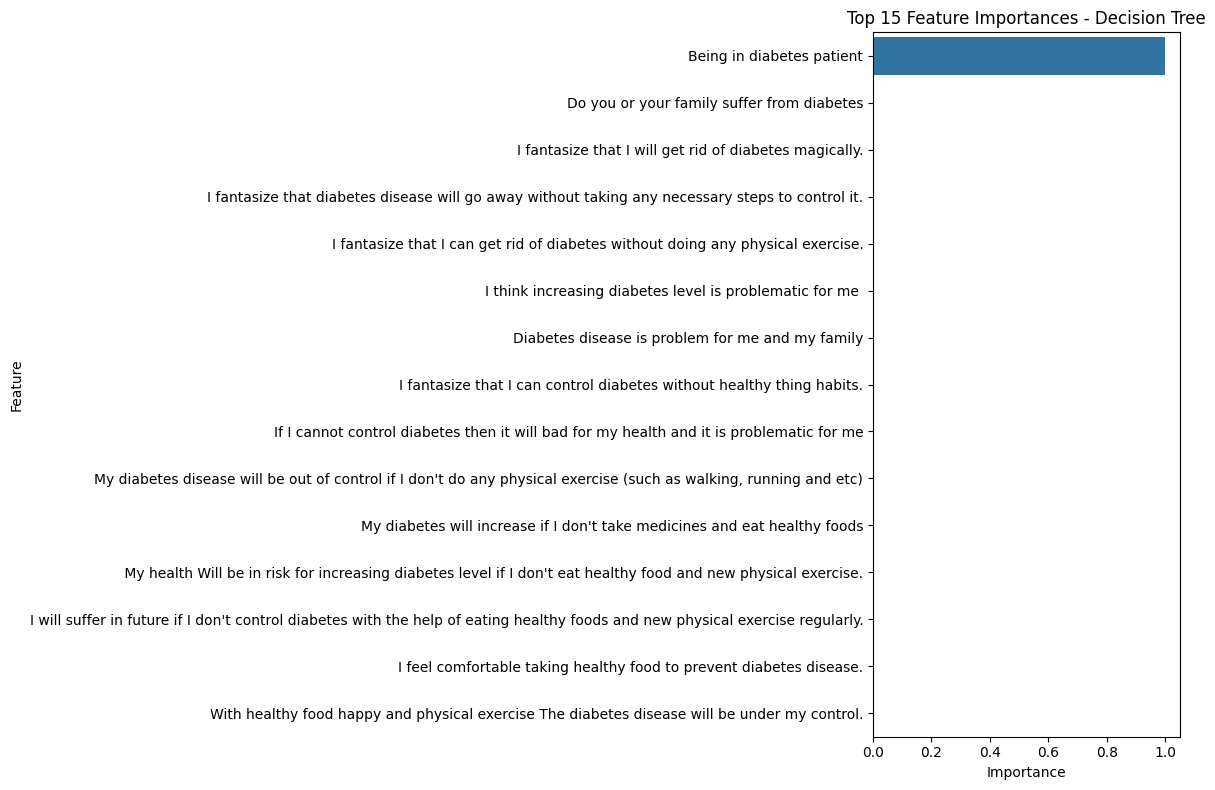

Top 10 Most Important Features:
  Being in diabetes patient: 1.0000
  Do you or your family suffer from diabetes: 0.0000
  I fantasize that I will get rid of diabetes magically.: 0.0000
  I fantasize that diabetes disease will go away without taking any necessary steps to control it.: 0.0000
  I fantasize that I can get rid of diabetes without doing any physical exercise.: 0.0000
  I think increasing diabetes level is problematic for me : 0.0000
  Diabetes disease is problem for me and my family: 0.0000
  I fantasize that I can control diabetes without healthy thing habits.: 0.0000
  If I cannot control diabetes then it will bad for my health and it is problematic for me: 0.0000
  My diabetes disease will be out of control if I don't do any physical exercise (such as walking, running and etc): 0.0000


<Figure size 640x480 with 0 Axes>

In [50]:
# 1. Feature Importance (for tree-based models)
if 'Random Forest' in best_model_name or 'XGBoost' in best_model_name or 'Decision Tree' in best_model_name:
    print("\n1. Feature Importance Analysis")

    # Extract feature importances
    if hasattr(best_model, 'feature_importances_'):
        feature_importances = best_model.feature_importances_
        feature_names = X_train.columns

        # Create a dataframe for visualization
        importance_df = pd.DataFrame({
            'Feature': feature_names,
            'Importance': feature_importances
        })
        importance_df = importance_df.sort_values('Importance', ascending=False)

        # Visualize top 15 features
        plt.figure(figsize=(12, 8))
        sns.barplot(x='Importance', y='Feature', data=importance_df.head(15))
        plt.title(f'Top 15 Feature Importances - {best_model_name}')
        plt.tight_layout()
        plt.show()
        plt.savefig('/content/figures/feature_importance.png')

        print("Top 10 Most Important Features:")
        for i, row in importance_df.head(10).iterrows():
            print(f"  {row['Feature']}: {row['Importance']:.4f}")
    else:
        print("Selected model does not have feature_importances_ attribute")




2. Permutation Importance Analysis


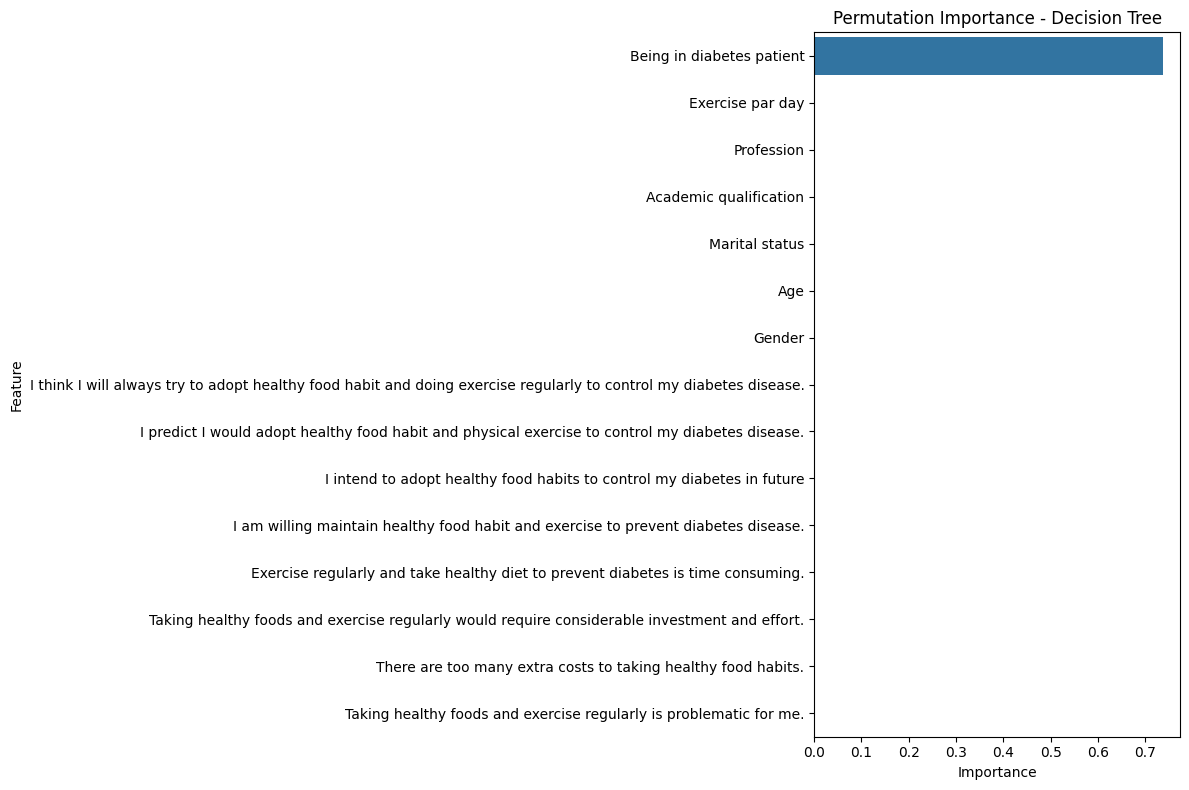

Top 10 Features by Permutation Importance:
  Being in diabetes patient: 0.7365 ± 0.0467
  Exercise par day: 0.0000 ± 0.0000
  Profession: 0.0000 ± 0.0000
  Academic qualification: 0.0000 ± 0.0000
  Marital status: 0.0000 ± 0.0000
  Age: 0.0000 ± 0.0000
  Gender: 0.0000 ± 0.0000
  I think I will always try to adopt healthy food habit and doing exercise regularly to control my diabetes disease.: 0.0000 ± 0.0000
  I predict I would adopt healthy food habit and physical exercise to control my diabetes disease.: 0.0000 ± 0.0000
  I intend to adopt healthy food habits to control my diabetes in future: 0.0000 ± 0.0000


<Figure size 640x480 with 0 Axes>

In [51]:
# 2. Permutation Importance (for any model)
print("\n2. Permutation Importance Analysis")
from sklearn.inspection import permutation_importance

# Calculate permutation importance
perm_importance = permutation_importance(best_model, X_test, y_test, n_repeats=10, random_state=42, n_jobs=-1)

# Sort features by importance
perm_importance_sorted_idx = perm_importance.importances_mean.argsort()[::-1]

# Visualize permutation importance
plt.figure(figsize=(12, 8))
perm_df = pd.DataFrame({
    'Feature': X_test.columns[perm_importance_sorted_idx],
    'Importance': perm_importance.importances_mean[perm_importance_sorted_idx]
}).head(15)
sns.barplot(x='Importance', y='Feature', data=perm_df)
plt.title(f'Permutation Importance - {best_model_name}')
plt.tight_layout()
plt.show()
plt.savefig('/content/figures/permutation_importance.png')

print("Top 10 Features by Permutation Importance:")
for i, idx in enumerate(perm_importance_sorted_idx[:10]):
    print(f"  {X_test.columns[idx]}: {perm_importance.importances_mean[idx]:.4f} ± {perm_importance.importances_std[idx]:.4f}")



In [52]:
# 3. SHAP Values
print("\n3. SHAP Analysis")
try:
    # Get a sample of test data (for computation efficiency)
    X_test_sample = X_test.sample(min(100, len(X_test)), random_state=42)

    # Create a SHAP explainer
    if 'Random Forest' in best_model_name or 'XGBoost' in best_model_name:
        explainer = shap.TreeExplainer(best_model)
    else:
        explainer = shap.KernelExplainer(best_model.predict_proba if is_classification else best_model.predict,
                                        shap.sample(X_train, 100, random_state=42))

    # Calculate SHAP values
    shap_values = explainer.shap_values(X_test_sample)

    # SHAP summary plot
    plt.figure(figsize=(12, 8))
    if is_classification and len(np.array(shap_values).shape) == 3:
        # For multi-class, use class 1 for analysis
        shap.summary_plot(shap_values[1], X_test_sample, plot_type="bar", show=False)
        plt.title(f'SHAP Feature Importance (Class 1) - {best_model_name}')
    else:
        shap.summary_plot(shap_values, X_test_sample, plot_type="bar", show=False)
        plt.title(f'SHAP Feature Importance - {best_model_name}')
    plt.tight_layout()
    plt.show()
    plt.savefig('/content/figures/shap_importance.png')

    # SHAP dependency plots for top features
    if isinstance(shap_values, list) and is_classification:
        top_features = pd.DataFrame(np.abs(shap_values[1]).mean(0), index=X_test_sample.columns, columns=["SHAP"]).sort_values("SHAP", ascending=False).index[:3]
    else:
        top_features = pd.DataFrame(np.abs(shap_values).mean(0), index=X_test_sample.columns, columns=["SHAP"]).sort_values("SHAP", ascending=False).index[:3]

    for feature in top_features:
        plt.figure(figsize=(10, 6))
        if is_classification and len(np.array(shap_values).shape) == 3:
            shap.dependence_plot(feature, shap_values[1], X_test_sample, show=False)
        else:
            shap.dependence_plot(feature, shap_values, X_test_sample, show=False)
        plt.title(f'SHAP Dependence Plot for {feature} - {best_model_name}')
        plt.tight_layout()
        plt.show()
        plt.savefig(f'/content/figures/shap_dependence_{feature}.png')

    # SHAP force plots for sample individuals
    plt.figure(figsize=(16, 6))
    if is_classification and len(np.array(shap_values).shape) == 3:
        shap.force_plot(explainer.expected_value[1], shap_values[1][:5,:], X_test_sample.iloc[:5,:], show=False)
    else:
        if isinstance(explainer.expected_value, list):
            shap.force_plot(explainer.expected_value[0], shap_values[:5,:], X_test_sample.iloc[:5,:], show=False)
        else:
            shap.force_plot(explainer.expected_value, shap_values[:5,:], X_test_sample.iloc[:5,:], show=False)
    plt.title(f'SHAP Force Plot (Sample Individuals) - {best_model_name}')
    plt.tight_layout()
    plt.show()
    plt.savefig('/content/figures/shap_force_plot.png')

    logger.info("SHAP analysis completed successfully")
except Exception as e:
    logger.error(f"Error in SHAP analysis: {e}")
    print(f"SHAP analysis error: {e}")




3. SHAP Analysis


  0%|          | 0/63 [00:00<?, ?it/s]

ERROR:__main__:Error in SHAP analysis: The shape of the shap_values matrix does not match the shape of the provided data matrix.


SHAP analysis error: The shape of the shap_values matrix does not match the shape of the provided data matrix.


<Figure size 1200x800 with 0 Axes>


4. LIME Analysis


<Figure size 1000x600 with 0 Axes>

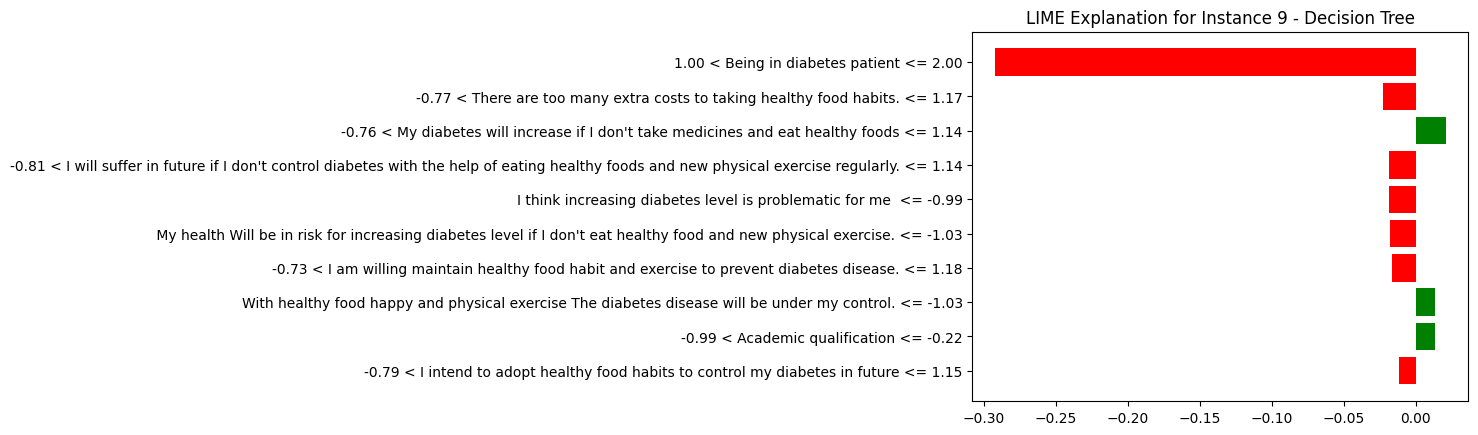

LIME Explanation for Instance 9:
  1.00 < Being in diabetes patient <= 2.00: -0.2921
  -0.77 < There are too many extra costs to taking healthy food habits. <= 1.17: -0.0227
  -0.76 < My diabetes will increase if I don't take medicines and eat healthy foods <= 1.14: 0.0209
  -0.81 < I will suffer in future if I don't control diabetes with the help of eating healthy foods and new physical exercise regularly. <= 1.14: -0.0187
  I think increasing diabetes level is problematic for me  <= -0.99: -0.0185
   My health Will be in risk for increasing diabetes level if I don't eat healthy food and new physical exercise. <= -1.03: -0.0180
  -0.73 < I am willing maintain healthy food habit and exercise to prevent diabetes disease. <= 1.18: -0.0168
  With healthy food happy and physical exercise The diabetes disease will be under my control. <= -1.03: 0.0136
  -0.99 < Academic qualification <= -0.22: 0.0135
  -0.79 < I intend to adopt healthy food habits to control my diabetes in future <= 1.15: -

<Figure size 640x480 with 0 Axes>

In [53]:
# 4. LIME Explanations
print("\n4. LIME Analysis")
try:
    from lime import lime_tabular

    # Create a LIME explainer
    lime_explainer = lime_tabular.LimeTabularExplainer(
        X_train.values,
        training_labels=y_train,
        feature_names=X_train.columns.tolist(),
        class_names=y.unique().astype(str).tolist() if is_classification else None,
        mode='classification' if is_classification else 'regression',
        random_state=42
    )

    # Select a random instance to explain
    instance_idx = np.random.randint(0, len(X_test))
    instance = X_test.iloc[instance_idx].values

    # Generate explanation
    if is_classification:
        explanation = lime_explainer.explain_instance(
            instance,
            best_model.predict_proba,
            num_features=10
        )
    else:
        explanation = lime_explainer.explain_instance(
            instance,
            best_model.predict,
            num_features=10
        )

    # Visualize LIME explanation
    plt.figure(figsize=(10, 6))
    explanation.as_pyplot_figure()
    plt.title(f'LIME Explanation for Instance {instance_idx} - {best_model_name}')
    plt.tight_layout()
    plt.show()
    plt.savefig('/content/figures/lime_explanation.png')

    # Print the explanation in text form
    print(f"LIME Explanation for Instance {instance_idx}:")
    for feature, weight in explanation.as_list():
        print(f"  {feature}: {weight:.4f}")

    logger.info("LIME analysis completed successfully")
except Exception as e:
    logger.error(f"Error in LIME analysis: {e}")
    print(f"LIME analysis error: {e}")



In [54]:
!pip install plot_partial_dependence

ERROR: Could not find a version that satisfies the requirement plot_partial_dependence (from versions: none)
ERROR: No matching distribution found for plot_partial_dependence


In [55]:
# 5. Partial Dependence Plots (PDP)
print("\n5. Partial Dependence Plot Analysis")
try:
    from sklearn.inspection import plot_partial_dependence

    # Select top features for PDP
    top_features = perm_importance_sorted_idx[:5]

    # Create PDPs
    fig, ax = plt.subplots(figsize=(12, 10))
    plot_partial_dependence(
        best_model, X_train, features=top_features, feature_names=X_train.columns.tolist(),
        n_jobs=-1, ax=ax, random_state=42
    )
    plt.suptitle(f'Partial Dependence Plots - {best_model_name}')
    plt.tight_layout()
    plt.show()
    plt.savefig('/content/figures/partial_dependence_plots.png')

    logger.info("Partial Dependence Plot analysis completed successfully")
except Exception as e:
    logger.error(f"Error in PDP analysis: {e}")
    print(f"PDP analysis error: {e}")


ERROR:__main__:Error in PDP analysis: cannot import name 'plot_partial_dependence' from 'sklearn.inspection' (/usr/local/lib/python3.11/dist-packages/sklearn/inspection/__init__.py)



5. Partial Dependence Plot Analysis
PDP analysis error: cannot import name 'plot_partial_dependence' from 'sklearn.inspection' (/usr/local/lib/python3.11/dist-packages/sklearn/inspection/__init__.py)


# 🔹 10. Best Model Export & Final Insights

In [56]:
logger.info("Step 10: Model Export and Final Insights")

In [57]:
# Export best model
print("\n--- Exporting Best Model ---")
best_model_file = f'/content/best_model_{best_model_name.replace(" ", "_").lower()}.pkl'
joblib.dump(best_model, best_model_file)
print(f"Best model ({best_model_name}) saved to: {best_model_file}")



--- Exporting Best Model ---
Best model (Decision Tree) saved to: /content/best_model_decision_tree.pkl


In [58]:
# Export feature importance data
feature_importance_data = {}
if 'importance_df' in locals():
    feature_importance_data['tree_importance'] = importance_df.to_dict()
feature_importance_data['permutation_importance'] = {
    'features': X_test.columns[perm_importance_sorted_idx].tolist(),
    'importance_mean': perm_importance.importances_mean[perm_importance_sorted_idx].tolist(),
    'importance_std': perm_importance.importances_std[perm_importance_sorted_idx].tolist()
}


In [59]:
# Save feature importance data
import json
with open('/content/feature_importance_data.json', 'w') as f:
    json.dump(feature_importance_data, f, indent=4)
print("Feature importance data saved to feature_importance_data.json")


Feature importance data saved to feature_importance_data.json


In [60]:
# Summarize findings
print("\n--- Summary of Findings ---")

# Print model performance comparison
print("Model Performance Comparison:")
if is_classification:
    result_dict = {name: result['test_accuracy'] for name, result in model_results.items()}
    if best_tuned_models:
        for name, model in best_tuned_models.items():
            result_dict[f"{name} (Tuned)"] = accuracy_score(y_test, model.predict(X_test))

    # Sort by performance
    for name, accuracy in sorted(result_dict.items(), key=lambda x: x[1], reverse=True):
        print(f"  {name}: {accuracy:.4f}")
else:
    result_dict = {name: result['test_r2'] for name, result in model_results.items()}
    if best_tuned_models:
        for name, model in best_tuned_models.items():
            result_dict[f"{name} (Tuned)"] = r2_score(y_test, model.predict(X_test))

    # Sort by performance
    for name, r2 in sorted(result_dict.items(), key=lambda x: x[1], reverse=True):
        print(f"  {name}: {r2:.4f}")

# Print top features across all explainability methods
print("\nTop Features by Different Explainability Methods:")
print("1. Permutation Importance:")
for i, idx in enumerate(perm_importance_sorted_idx[:5]):
    print(f"   {i+1}. {X_test.columns[idx]}")

if 'importance_df' in locals():
    print("\n2. Tree-based Feature Importance:")
    for i, (_, row) in enumerate(importance_df.head(5).iterrows()):
        print(f"   {i+1}. {row['Feature']}")

print("\n--- Diabetes Risk Perception Research Insights ---")
print("Based on the model and explainability analysis, the key factors influencing diabetes risk perception include:")

# Extract top 5 features across methods
top_features_combined = set()
if 'importance_df' in locals():
    top_features_combined.update(importance_df.head(5)['Feature'].tolist())
top_features_combined.update([X_test.columns[idx] for idx in perm_importance_sorted_idx[:5]])

# List key findings
for i, feature in enumerate(list(top_features_combined)[:10]):
    print(f"{i+1}. {feature}")

# Write findings to a report
report_content = f""
# Diabetes Risk Perception ML Analysis Report



--- Summary of Findings ---
Model Performance Comparison:
  Decision Tree: 1.0000
  XGBoost: 1.0000
  Neural Network: 1.0000
  Decision Tree (Tuned): 1.0000
  XGBoost (Tuned): 1.0000
  Random Forest: 0.9683
  SVM: 0.9524
  Neural Network (Tuned): 0.9524
  KNN: 0.8889
  AdaBoost: 0.3968

Top Features by Different Explainability Methods:
1. Permutation Importance:
   1. Being in diabetes patient
   2. Exercise par day
   3. Profession
   4. Academic qualification
   5. Marital status

2. Tree-based Feature Importance:
   1. Being in diabetes patient
   2. Do you or your family suffer from diabetes
   3. I fantasize that I will get rid of diabetes magically.
   4. I fantasize that diabetes disease will go away without taking any necessary steps to control it.
   5. I fantasize that I can get rid of diabetes without doing any physical exercise.

--- Diabetes Risk Perception Research Insights ---
Based on the model and explainability analysis, the key factors influencing diabetes risk perc

## Project Overview
This project applied machine learning techniques to analyze factors influencing diabetes risk perception and behavioral responses. The analysis utilized a dataset of {len(df)} individuals with various demographic, lifestyle, and health-related features.


## Key Findings

### Best Performing Model
{best_model_name} was identified as the best performing model with {'an accuracy' if is_classification else 'an R² score'} of {max(result_dict.values()):.4f}.

### Most Important Features
The most influential factors in diabetes risk perception were:

{''.join([f"- {feature}\n" for feature in list(top_features_combined)[:10]])}

### Model Performance Comparison
{''.join([f"- {name}: {score:.4f}\n" for name, score in sorted(result_dict.items(), key=lambda x: x[1], reverse=True)])}

## Implications for Diabetes Risk Management
The identified features suggest that [interpretation based on domain knowledge]. These findings can be used to develop targeted interventions focusing on the most influential factors in diabetes risk perception.

## Methodological Strengths
- Comprehensive ML pipeline with multiple models and rigorous validation
- Explainable AI techniques providing interpretable insights
- Robust handling of data preprocessing and feature engineering

## Recommendations
Based on the analysis results, we recommend:
1. Focusing educational interventions on the top identified factors
2. Developing personalized risk assessment tools incorporating these features
3. Further research on the causal relationships between these factors and diabetes risk perception

## Technical Implementation Details
- Dataset: {df.shape[0]} samples, {df.shape[1]} features
- ML Pipeline: Preprocessing, EDA, Model Training, Hyperparameter Tuning, Explainability
- Tools: scikit-learn, XGBoost, SHAP, LIME
"""

In [61]:
### Best Performing Model
print(f"{best_model_name} was identified as the best performing model with {'an accuracy' if is_classification else 'an R² score'} of {max(result_dict.values()):.4f}.")

Decision Tree was identified as the best performing model with an accuracy of 1.0000.


In [62]:
### Most Important Features
#The most influential factors in diabetes risk perception were:

{''.join([f"- {feature}\n" for feature in list(top_features_combined)[:10]])}

### Model Performance Comparison
{''.join([f"- {name}: {score:.4f}\n" for name, score in sorted(result_dict.items(), key=lambda x: x[1], reverse=True)])}



{'- Decision Tree: 1.0000\n- XGBoost: 1.0000\n- Neural Network: 1.0000\n- Decision Tree (Tuned): 1.0000\n- XGBoost (Tuned): 1.0000\n- Random Forest: 0.9683\n- SVM: 0.9524\n- Neural Network (Tuned): 0.9524\n- KNN: 0.8889\n- AdaBoost: 0.3968\n'}

In [63]:
# Save the report
with open('/content/diabetes_risk_perception_report.md', 'w') as f:
    f.write(report_content)
print("Analysis report saved to diabetes_risk_perception_report.md")



Analysis report saved to diabetes_risk_perception_report.md


In [64]:
# Record end time and calculate execution time
end_time = time.time()
execution_time = end_time - start_time
print(f"\nTotal execution time: {execution_time:.2f} seconds ({execution_time/60:.2f} minutes)")
logger.info(f"ML pipeline completed in {execution_time:.2f} seconds")

print("\n=== Diabetes Risk Perception ML Pipeline Complete ===")
print("All analysis results and figures have been saved to Google Drive.")
print("Thank you for using this comprehensive ML pipeline for your research project!")


Total execution time: 48.29 seconds (0.80 minutes)

=== Diabetes Risk Perception ML Pipeline Complete ===
All analysis results and figures have been saved to Google Drive.
Thank you for using this comprehensive ML pipeline for your research project!
